# TASK 5: Final code 

In [1]:
## ---- Loading Packages Into Memory -------------------------------------------
library(readr)
library("ggplot2")
library("dplyr")
library("tidyr")
library("stringr")
#library("purr")
library("forcats")
library("grDevices")
library("data.table")
library("tidyverse")
library("latex2exp")
library("irlba") 
library("plot3D")
library("rgl")
library("kableExtra")
library("NbClust")
library(factoextra)
library(diceR)
library(cluster)
library(FactoMineR)
library("class")
library("MASS")
library("FNN")
library("mclust") # Good for GMM clustering/ BIC
library(ClusterR)
library(ConsensusClusterPlus)
library(ALL)
library(datasets)
library(irlba)
library(network)
library(huge)
library(ElemStatLearn)
library(gplots)
library(ClustAssess)

Warning message:
"package 'readr' was built under R version 4.1.3"
Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Warning message:
"package 'dplyr' was built under R version 4.1.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyr' was built under R version 4.1.3"
Warning message:
"package 'stringr' was built under R version 4.1.3"
Warning message:
"package 'forcats' was built under R version 4.1.3"
Warning message:
"package 'data.table' was built under R version 4.1.3"

Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


Warning message:
"package 'tidyverse' was built under R version 4.1.3"
-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v tibble 3.1.6     v purrr  0.3.4

Warning messa

In [2]:

## ---- Colour Palette ---------------------------------------------------------
    cbPalette <- c(
      "#999999", "#E69F00", "#56B4E9", "#009E73",
      "#F0E442", "#0072B2", "#D55E00", "#CC79A7") # colour-blind friendly palette

## ---- Data Set ---------------------------------------------------------------

    # Gene expression cancer RNA-Seq Data Set
    # https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq

    # loading dataset 
    data <- as_tibble(read.csv("data.csv",
                               header = TRUE,
                               row.names = 1))


    labels <- as_tibble(read.csv("labels.csv",
                                 header = TRUE,
                                 row.names = 1))

In [3]:
# Sort out the 5000 highest variance genes:

# Compute sd of each gene:
v <- apply(data, 2, sd)

# Sort from highest to lowest sd:
v<- rev(sort.list(v))

# Seems to be easier to work with dataframe than tibble
data <- as.data.frame(data)

# Select the 5000 genes with highest sd
hvf <- v[1:5000]
X <- data[,hvf]

# This was more useful as a matrix:
class <- as.matrix(labels)

end fraction

clustered

clustered



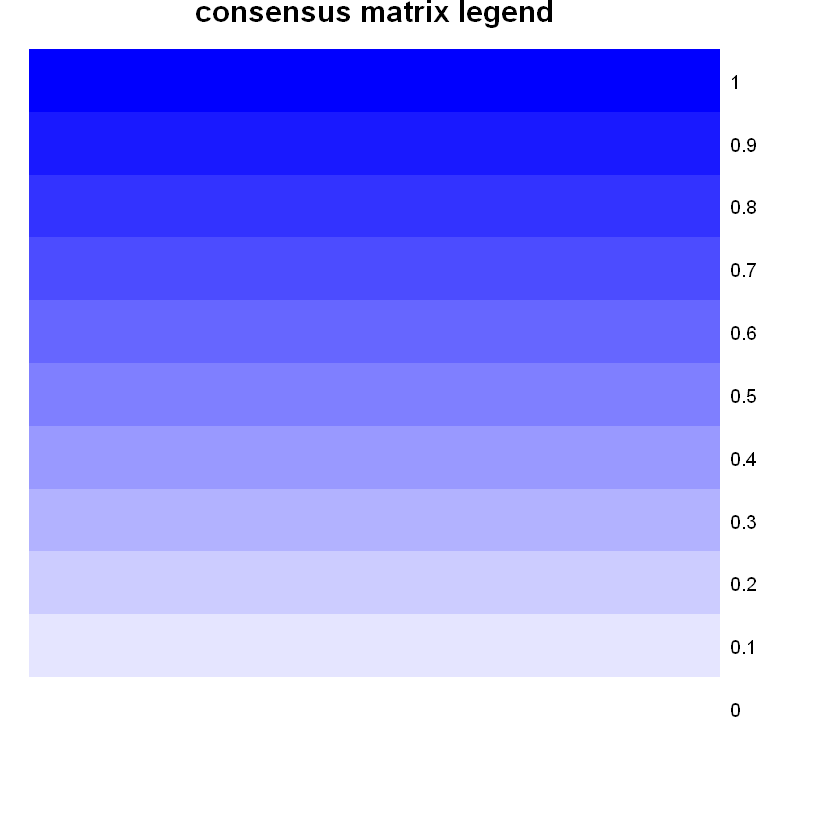

clustered



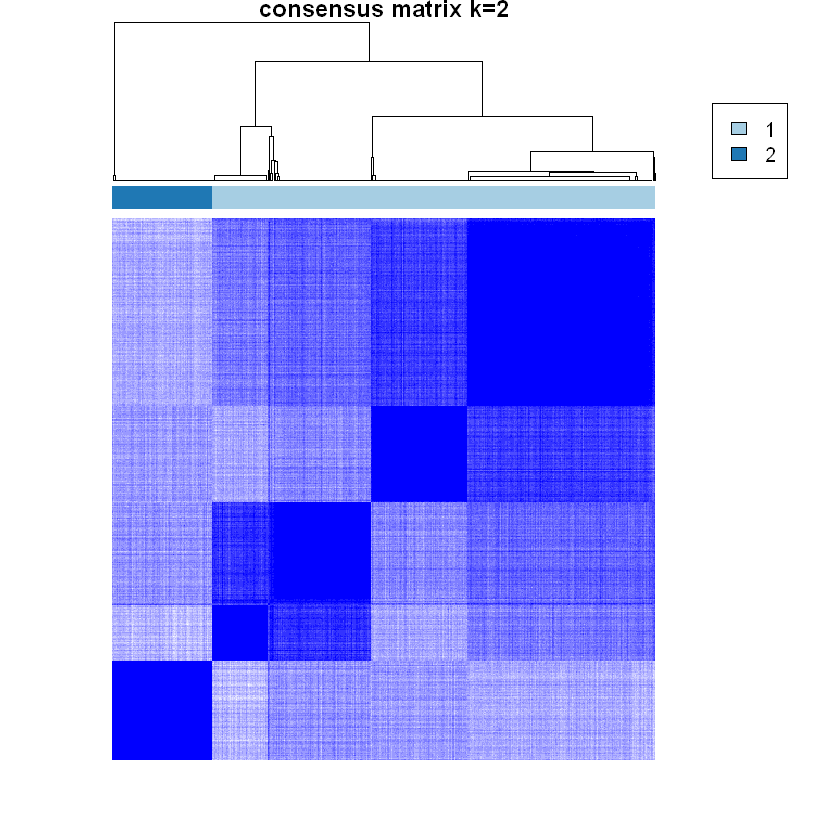

clustered



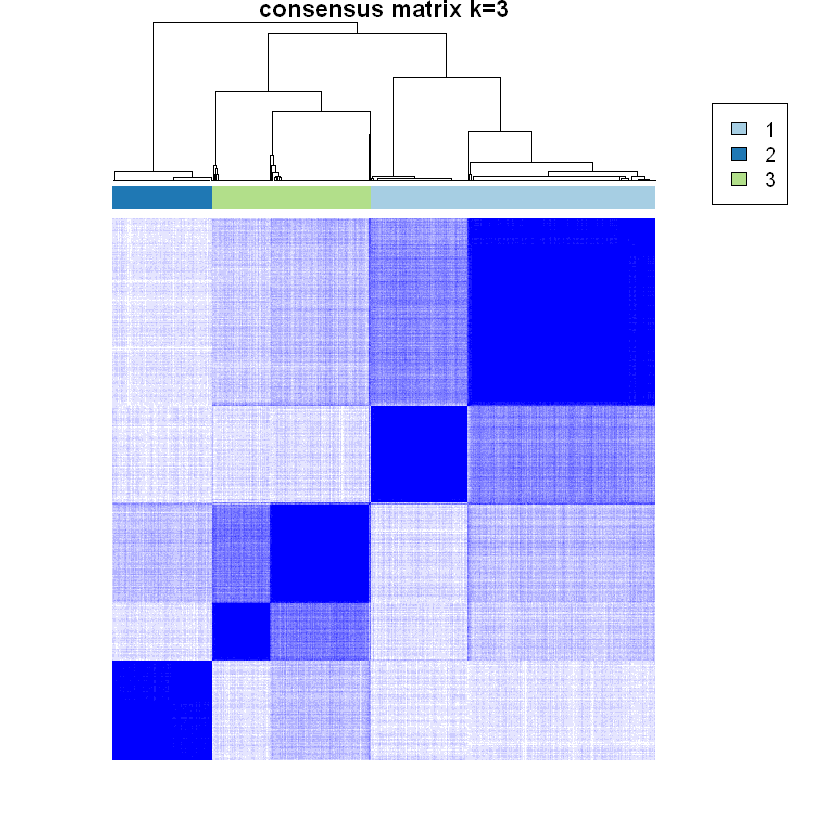

clustered



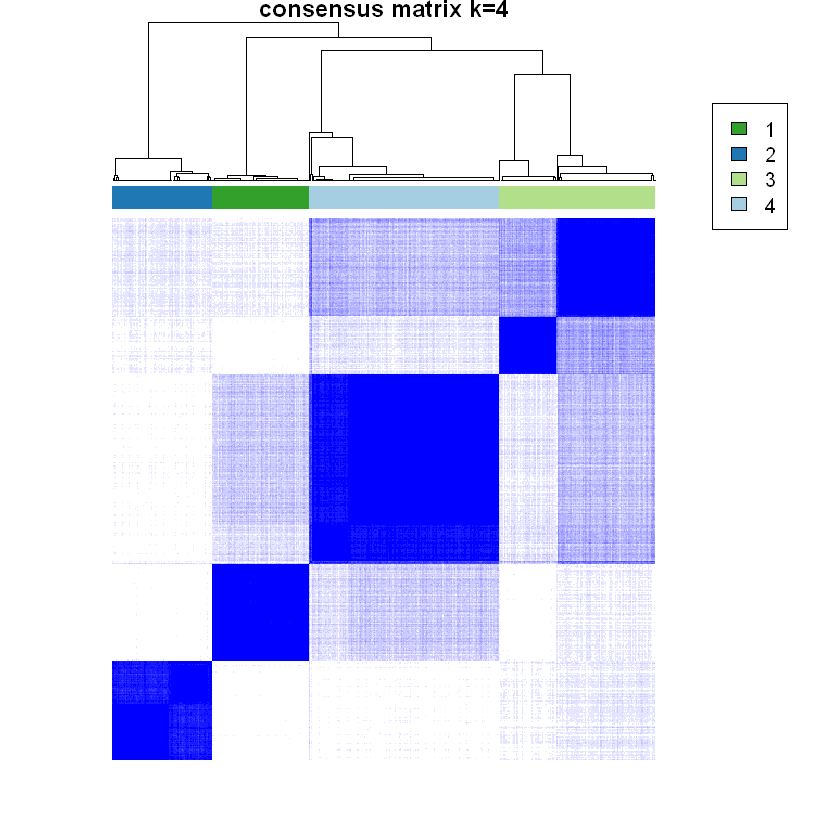

clustered



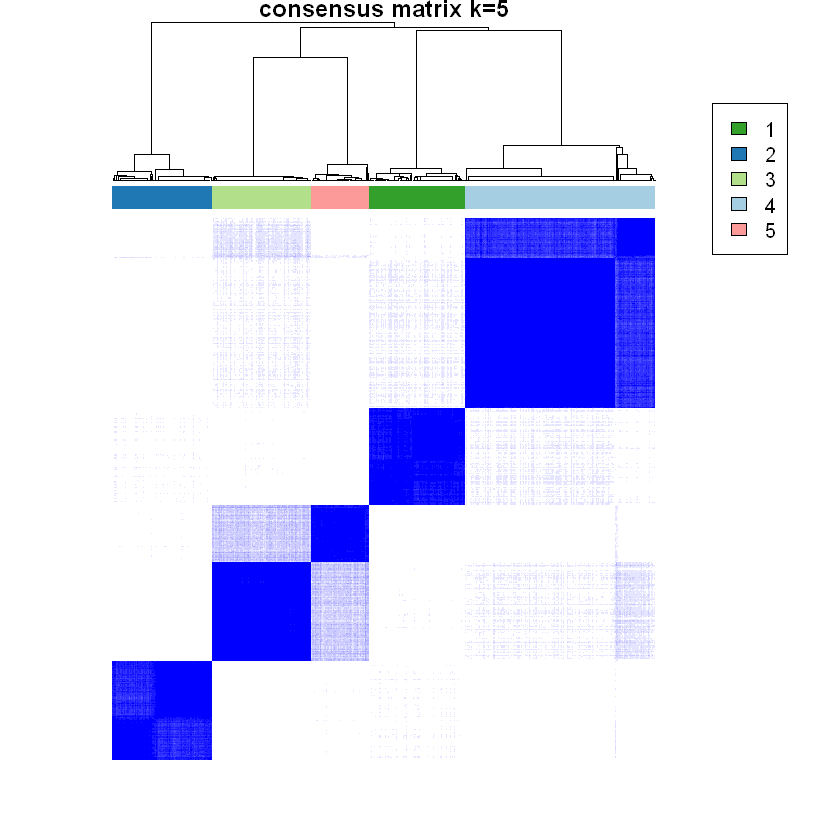

clustered



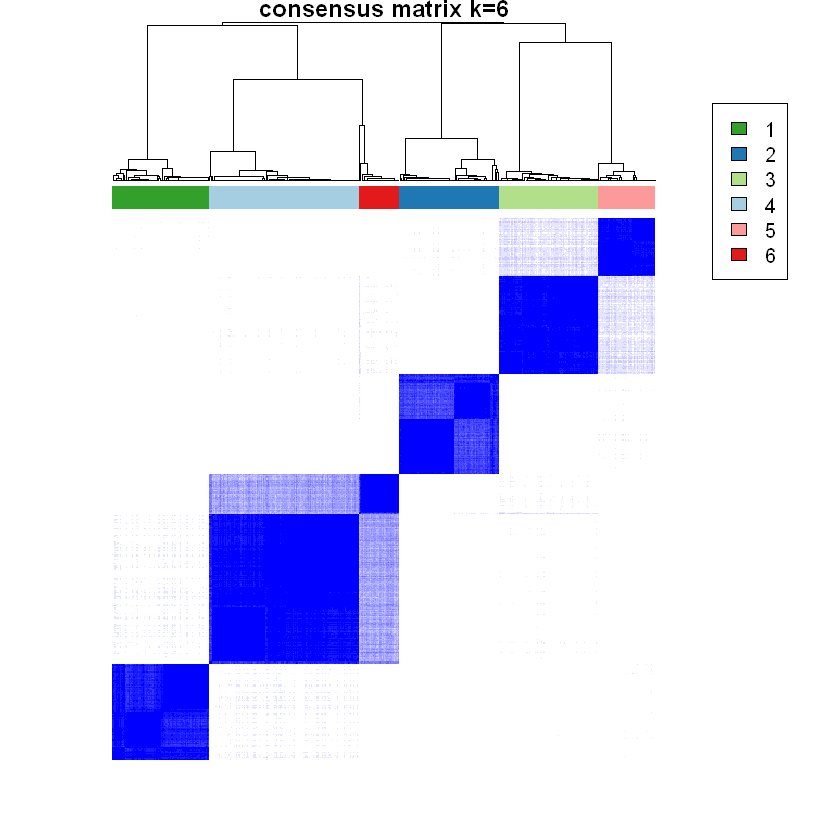

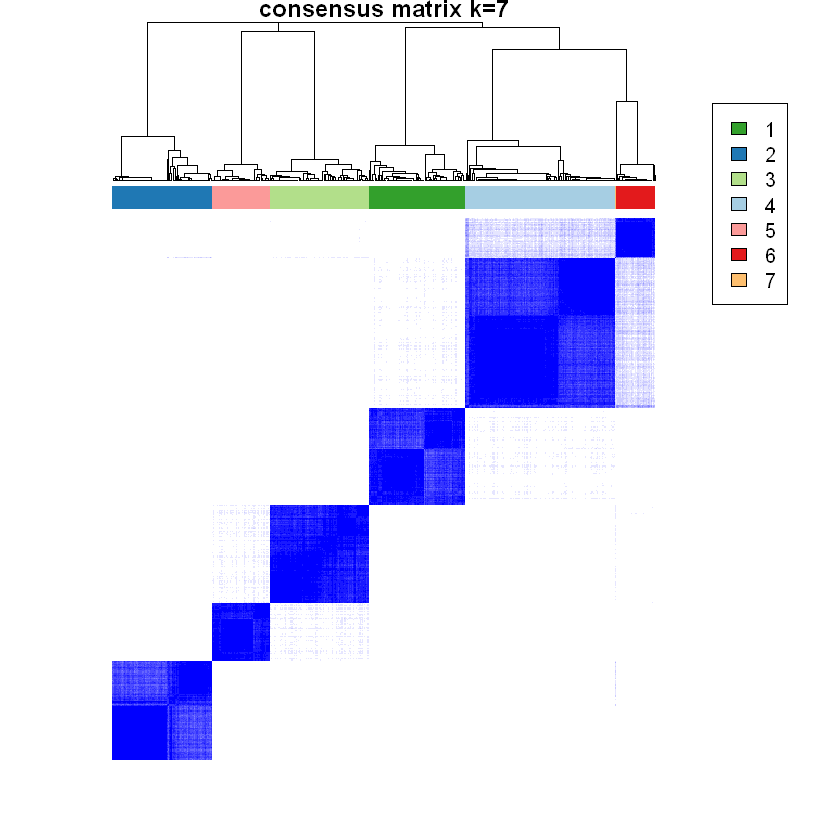

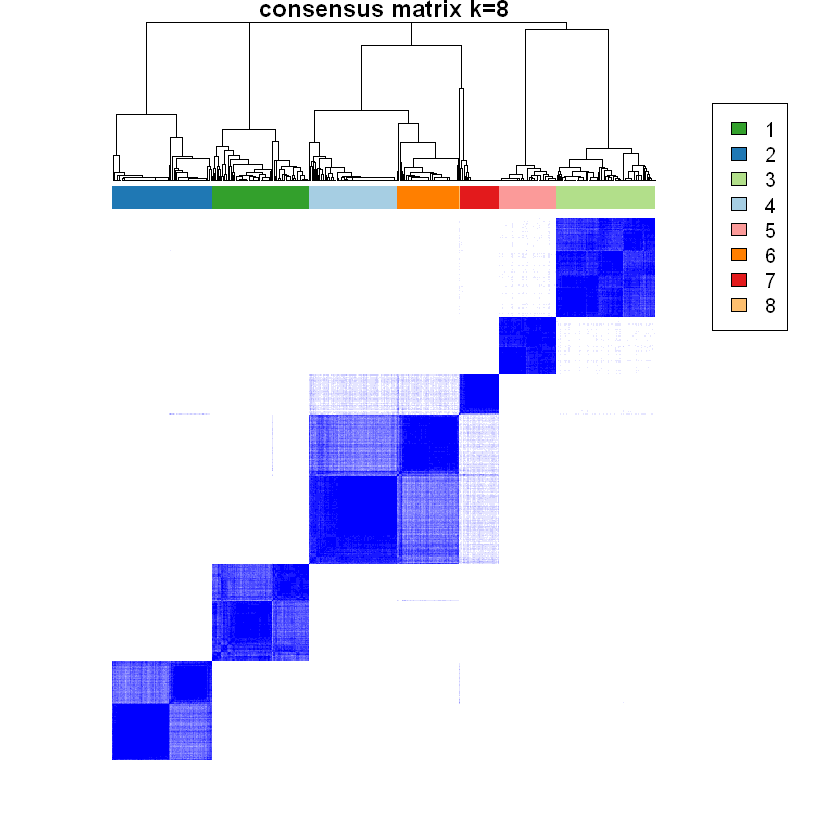

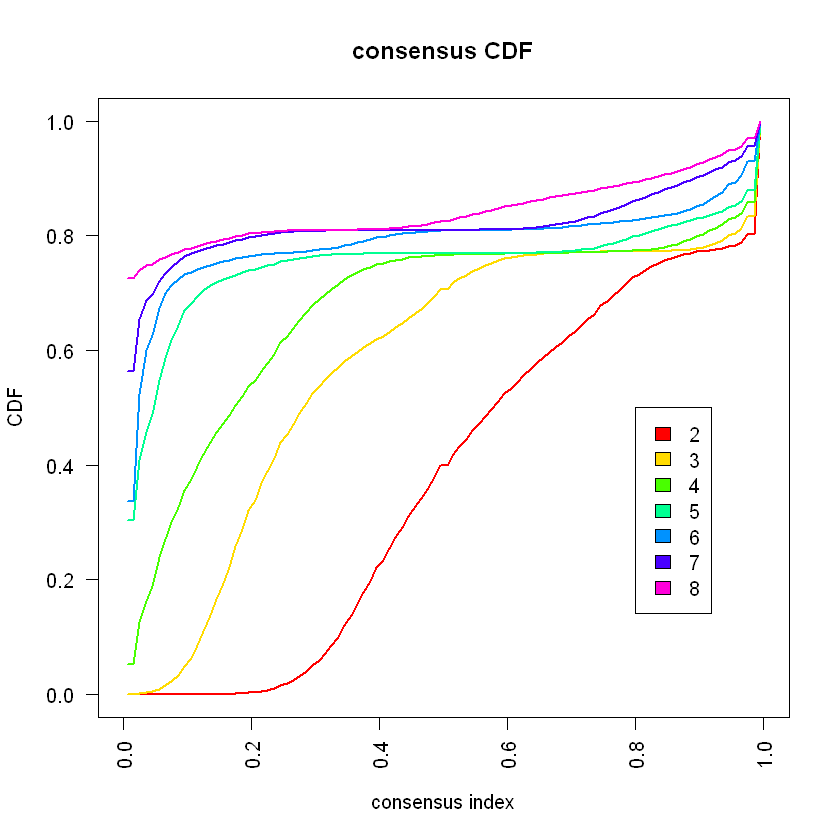

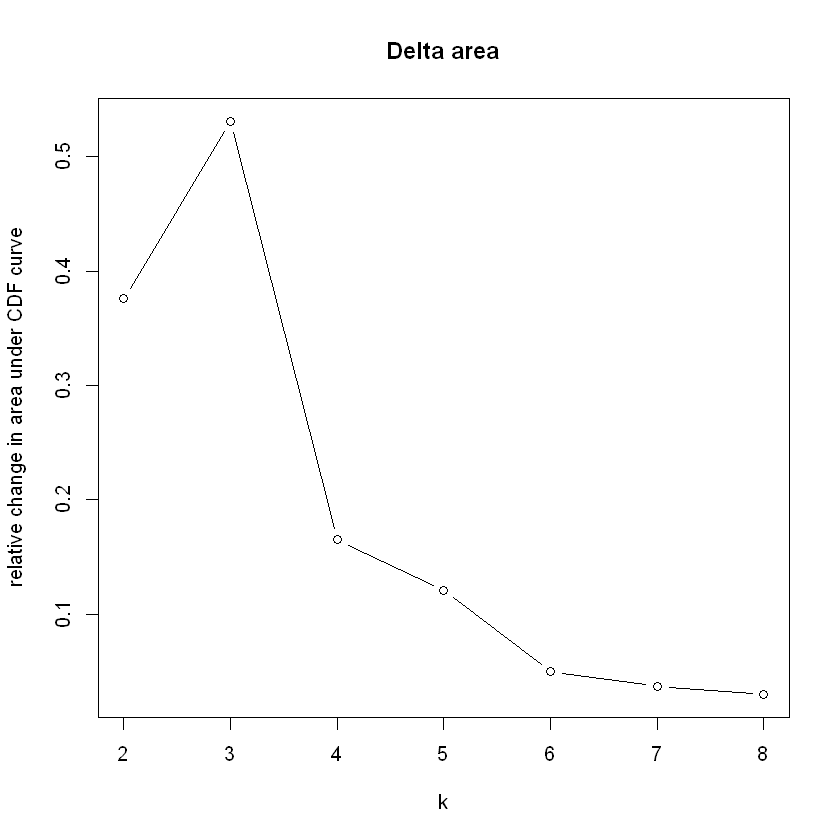

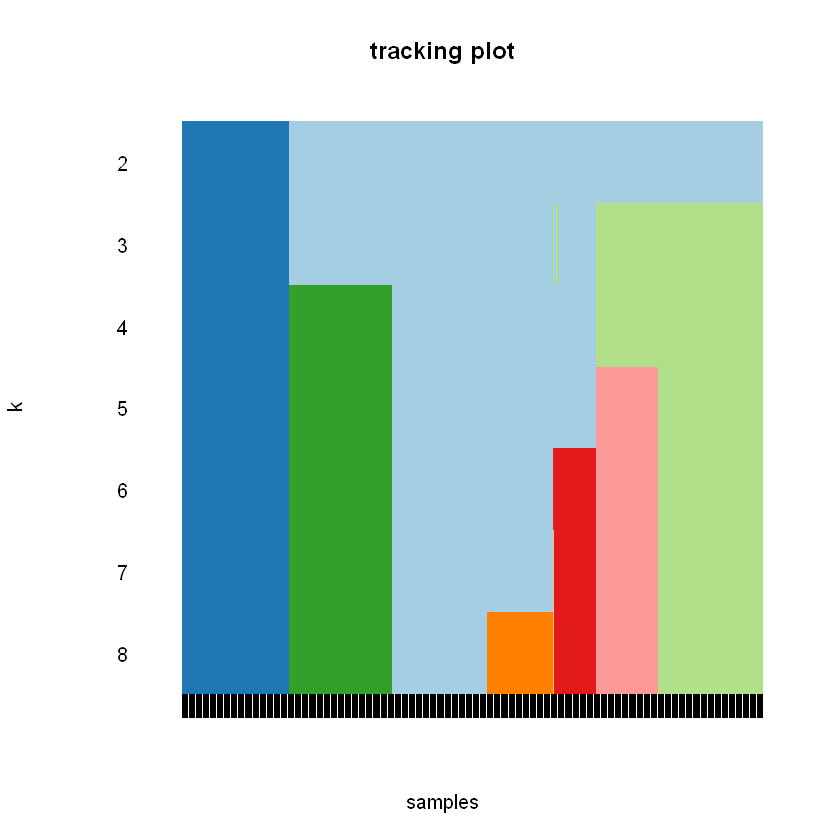

In [5]:
# ConsensusClusterPlus with kmeans
library(ConsensusClusterPlus)

#NOTEWORTHY about ConsensusClusterPlus:
# Can be quite slow.
# Consensus clustering subsamples from data set. Clusters by specified method for each k.
# Pairwise consensus values - prop that two observations end up in same cluster out of times they ended up in same subsample
# These values are computed for each pair of observations in the original sample and stored symmetric consensus matrix (1 on the diagonal ofc) 
# 1 matrix for each k
# Consensus matrix visualised/summarised through different plots available in the package
# Consensus values go from 0 (never in same cluster) to 1 (always in same cluster)

# Sample 100 random values between 1 and 801. 
ii<-sample(seq(1,801),500)
options(warn=-1)

# Consensus clustering with 
ckm<-ConsensusClusterPlus(as.matrix(t(data[ii,hvf[1:5000]])),maxK=8,reps=100,pItem=.6,pFeature=0.3,
                         clusterAlg="km", distance = "euclidean")

# This is consensus clustering using kmeans  (euclidean distance), with a maximum of 8 clusters.
options(warn=0)

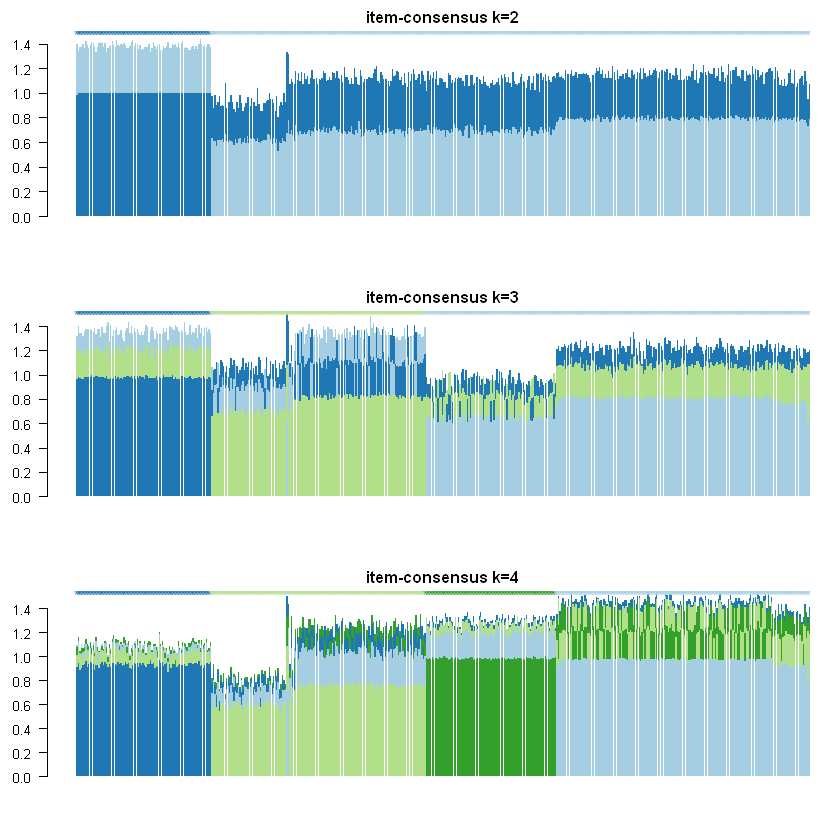

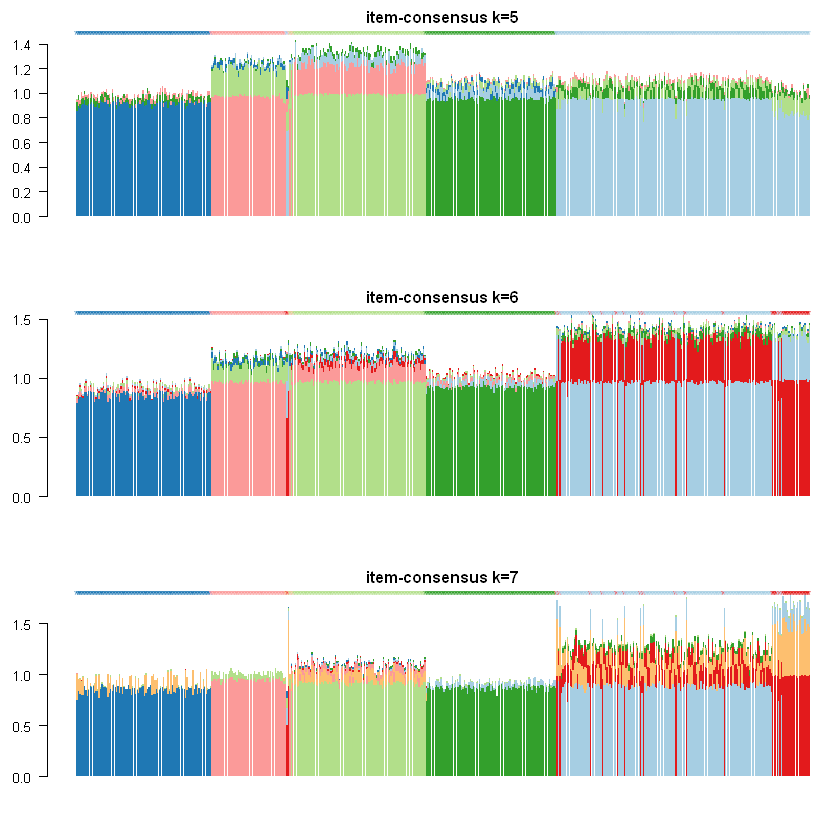

k,cluster,clusterConsensus
2,1,0.7240980
2,2,0.9996097
3,1,0.7501561
3,2,0.9776645
3,3,0.7736162
4,1,0.9825819
4,2,0.9307027
4,3,0.6994455
4,4,0.9639878
5,1,0.9502481


,k,cluster,item,itemConsensus
,<dbl>,<dbl>,<chr>,<dbl>
1,2,1,268,0.7894352
2,2,1,130,0.7273194
3,2,1,594,0.7515466
4,2,1,419,0.7761415
5,2,1,542,0.7798496


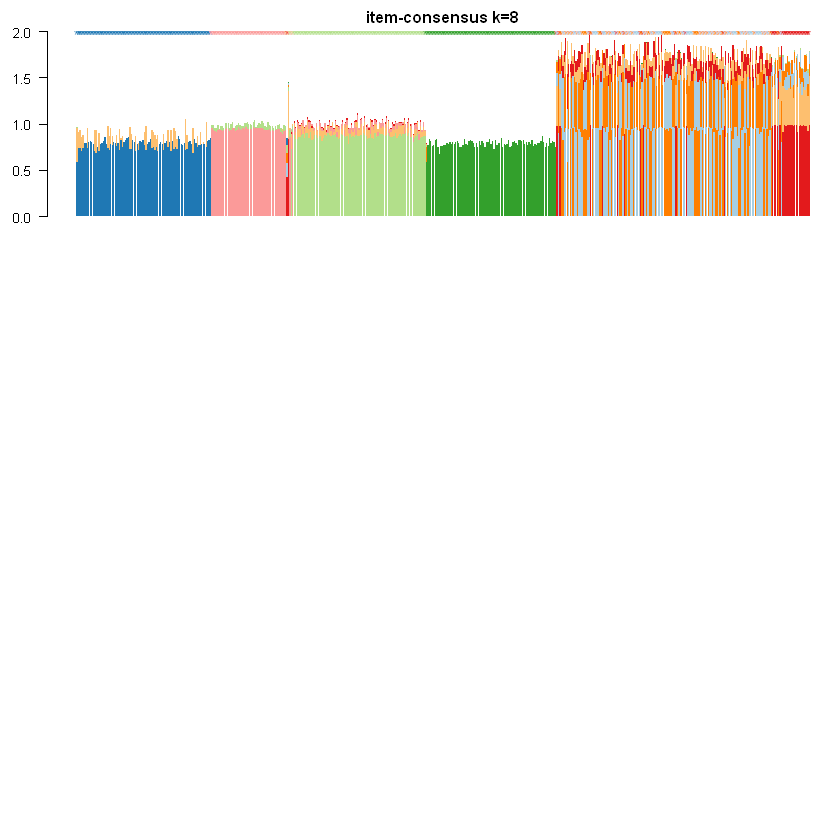

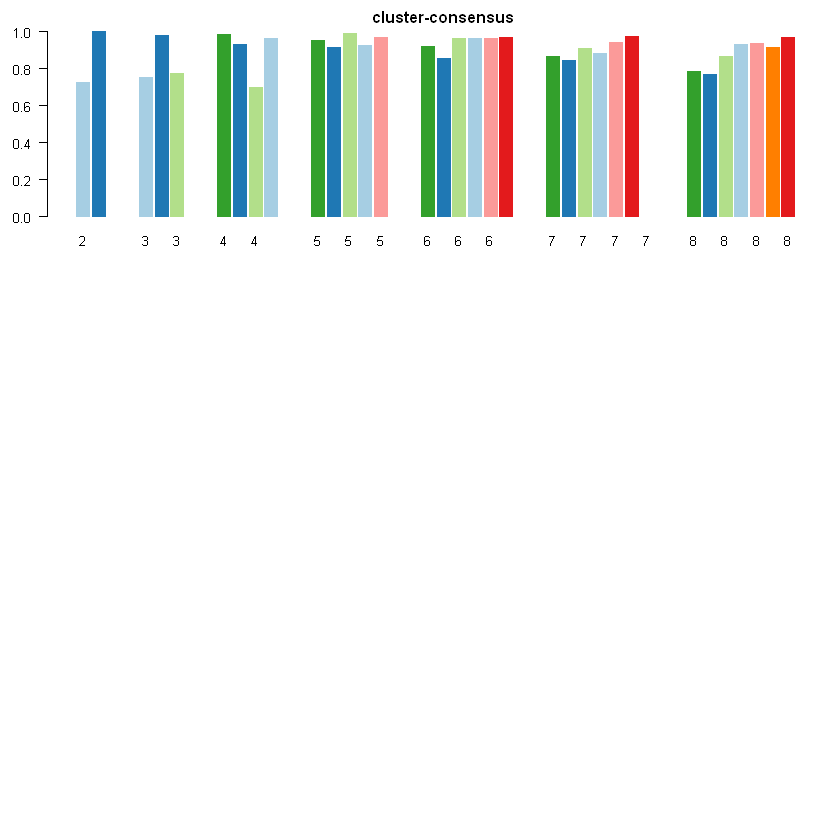

In [6]:
## Generating cluster and item consensus - I only did this for the first case
# because we do not really use these plots. 

icl.km <- calcICL(ckm)

#  calcICL returns a list of two elements:

# Cluster consensus
icl.km[["clusterConsensus"]]

# Item consensus
icl.km[["itemConsensus"]][1:5,]


      K=2       K=3       K=4       K=5       K=6       K=7       K=8 
0.8024128 0.8335952 0.8061403 0.5755912 0.5930100 0.3925050 0.2444810 
[1] 8


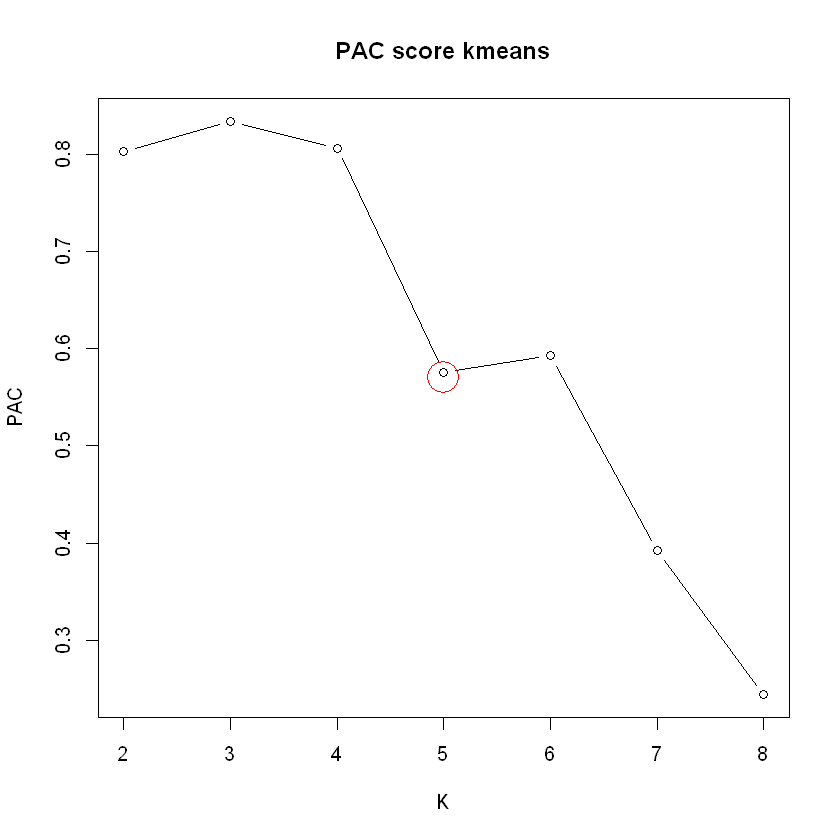

In [8]:
## PAC implementation from https://www.researchgate.net/publication/285923754_Implementing_the_PAC_measure_in_consensus_clustering/link/56645ea908ae192bbf908b7a/download

#Calculate PAC score:

maximum.K = 8           # Maximum cluster number
K = 2:maximum.K      
x1 = 0.01; x2 = 0.99    # Threshold  for the definition of the intermediate sub-interval of interest (as specified by project discription)
PAC = rep(NA,length(K)) # Initialise vector for PAC scores


names(PAC) = paste("K=",K,sep="") # from 2 to maximum.K

for(i in K){
  M = ckm[[i]]$consensusMatrix
  Fn = ecdf(M[lower.tri(M)])
  PAC[i-1] = Fn(x2) - Fn(x1)
}

# The optimal K
optK = K[which.min(PAC)]

print(PAC)
print(optK)
##############################

plot(c(2:8), PAC, type = "b", main = "PAC score kmeans", xlab = "K")
symbols(x=c(5), y=c(0.57), circles=0.15, add=T, inches=F, fg = "red")


In [9]:
# Do the consensus cluster overlap with the classes?

c<-ckm[[3]]
mda::confusion(c$consensusClass,class[ii,])
c<-ckm[[5]]
mda::confusion(c$consensusClass,class[ii,])
c<-ckm[[6]]
mda::confusion(c$consensusClass,class[ii,])

         true
predicted BRCA COAD KIRC LUAD PRAD
        1  172    0    0    1   89
        2    0    0   92    0    0
        3    0   53    1   92    0

         true
predicted BRCA COAD KIRC LUAD PRAD
        1    0    0    0    0   89
        2    0    0   92    0    0
        3    0    0    0   91    0
        4  172    0    1    2    0
        5    0   53    0    0    0

         true
predicted BRCA COAD KIRC LUAD PRAD
        1    0    0    0    0   89
        2    0    0   92    0    0
        3    0    0    0   91    0
        4  138    0    0    0    0
        5    0   53    0    0    0
        6   34    0    1    2    0

end fraction

clustered

clustered



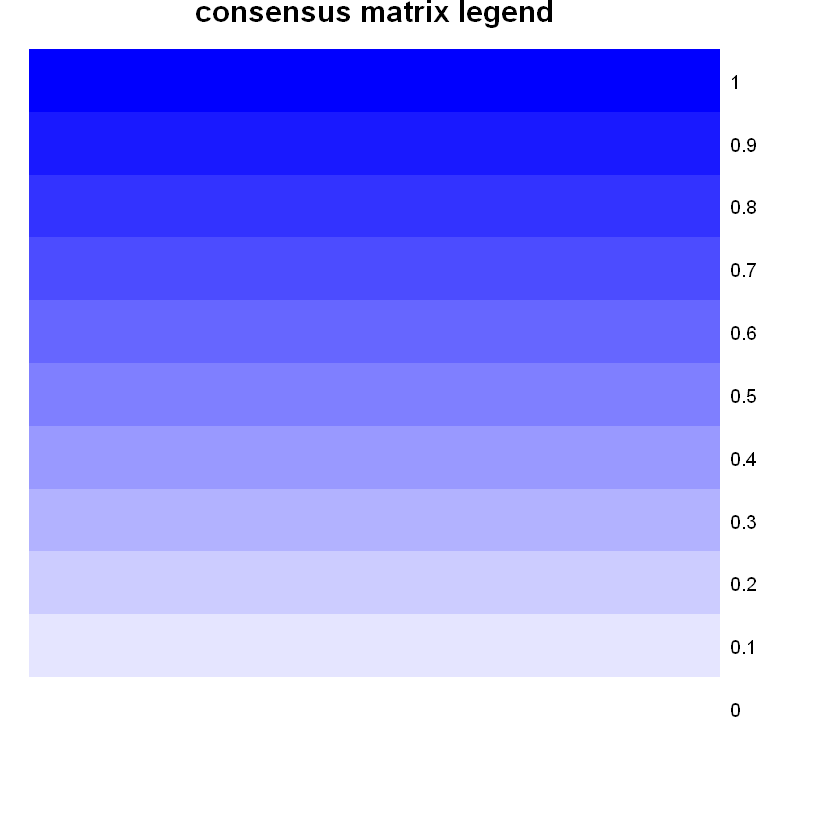

clustered



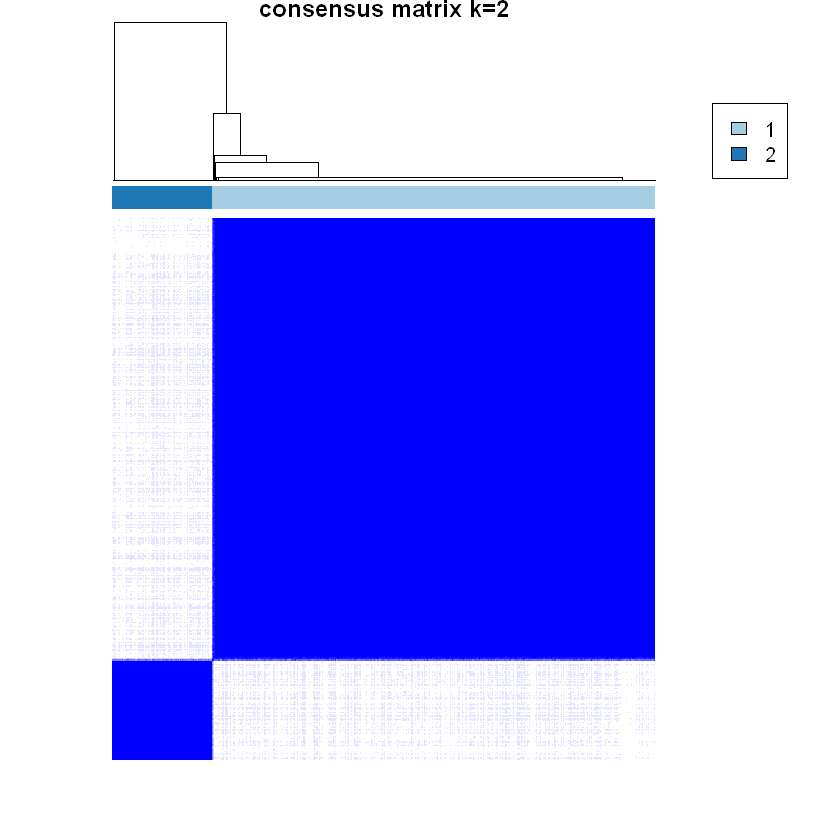

clustered



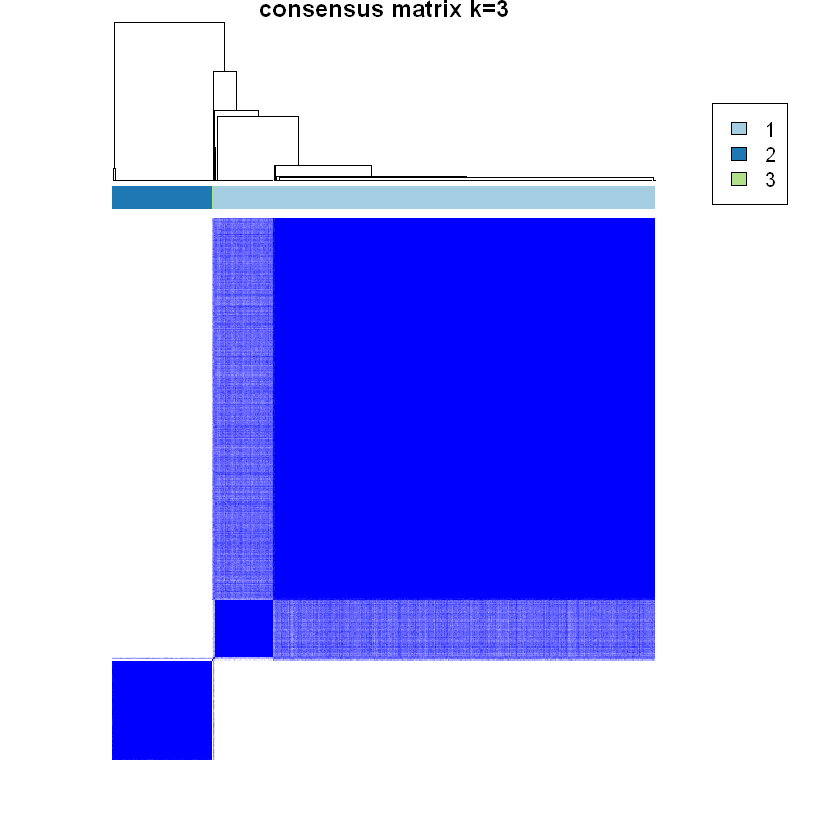

clustered



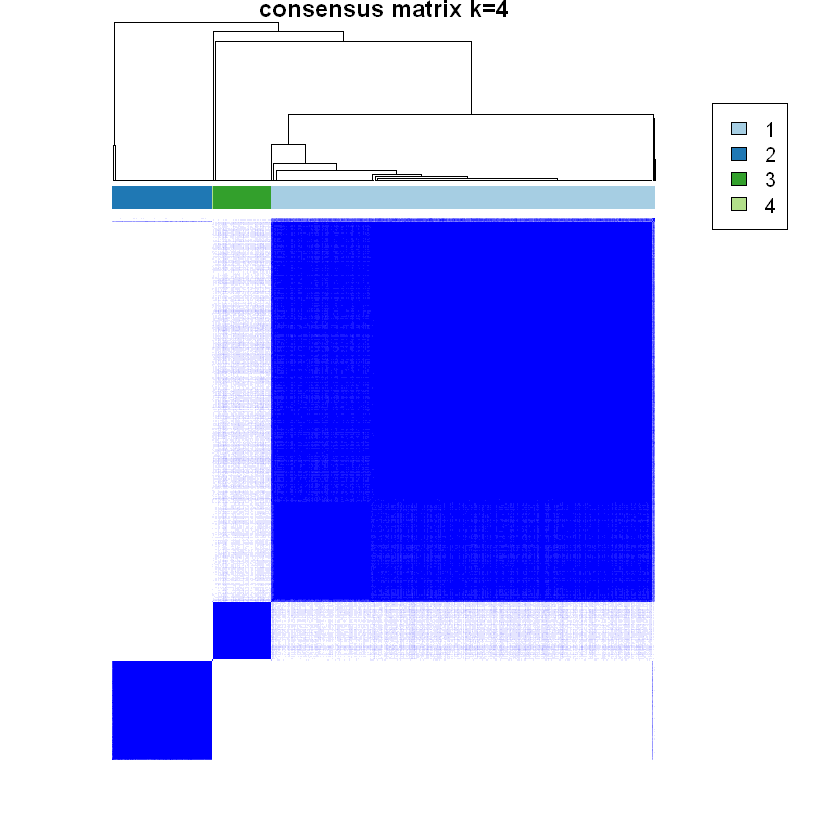

clustered



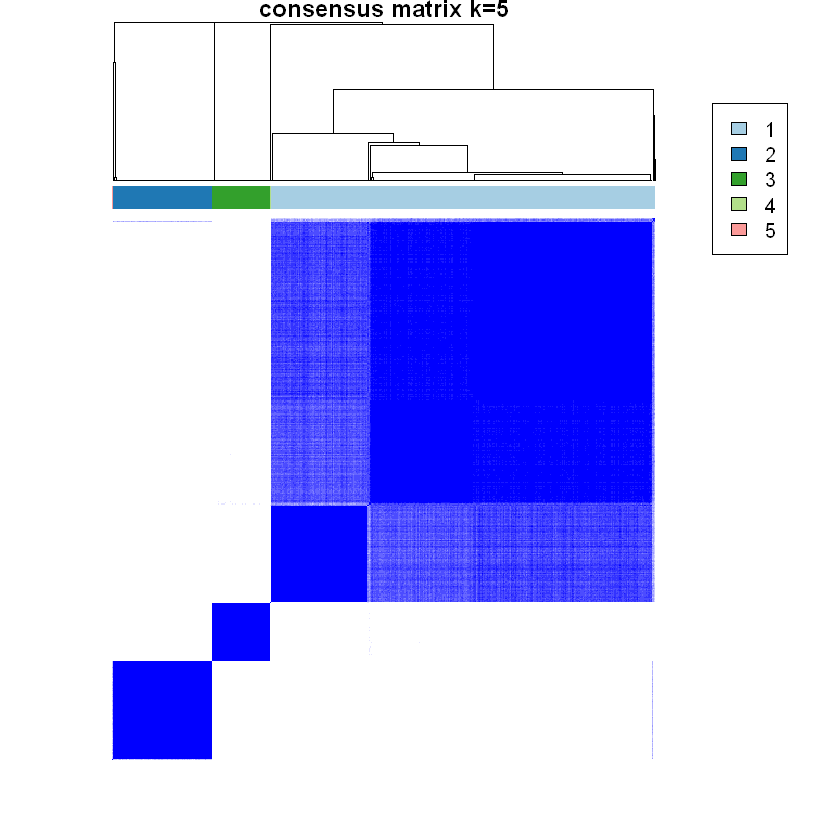

clustered



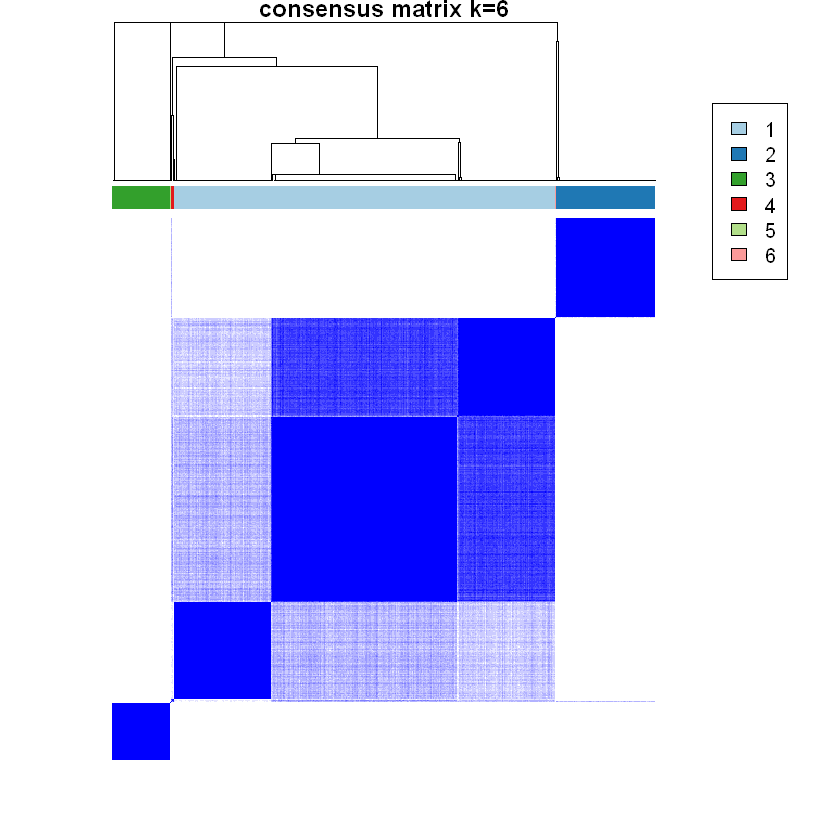

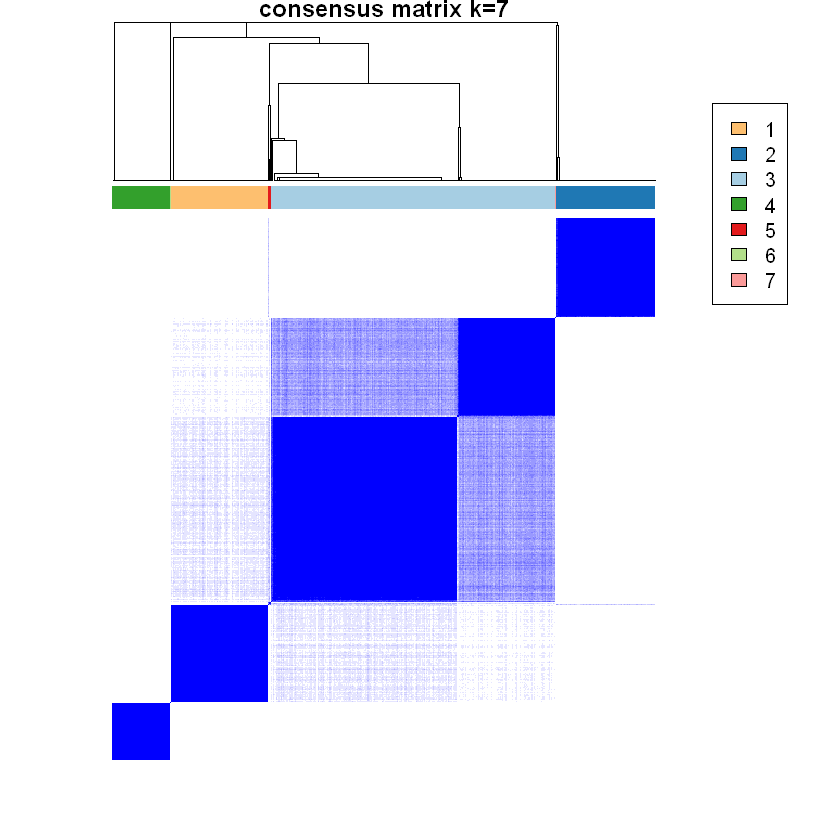

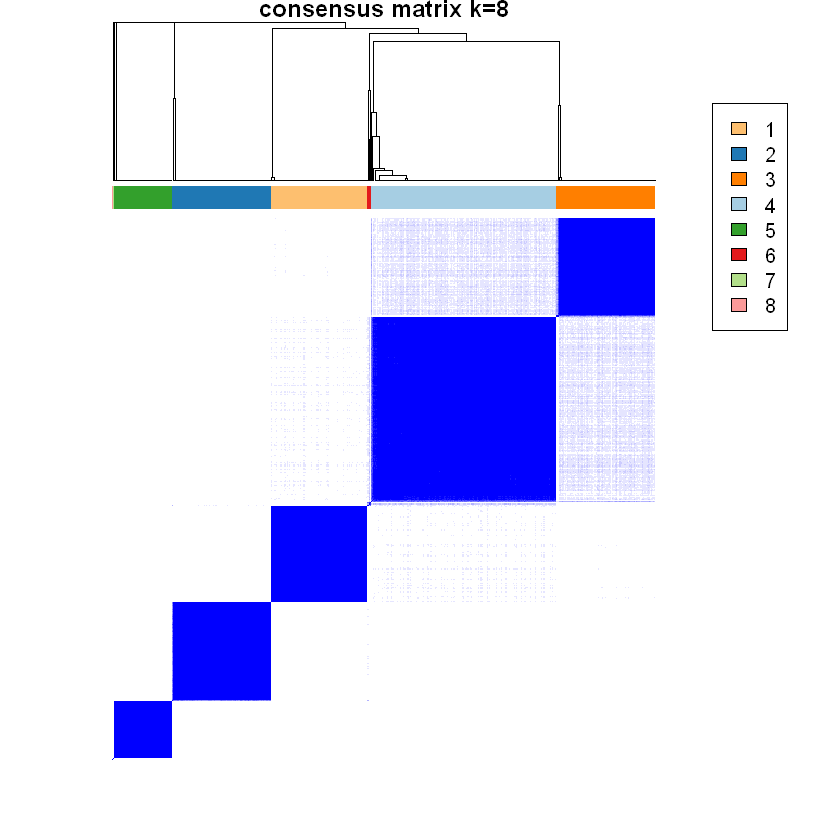

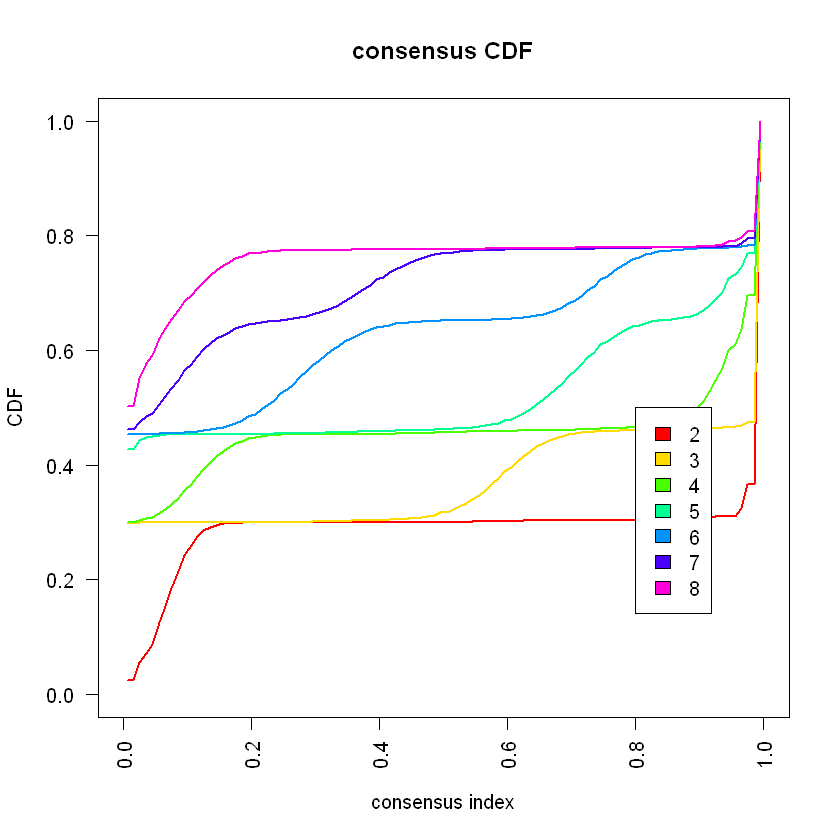

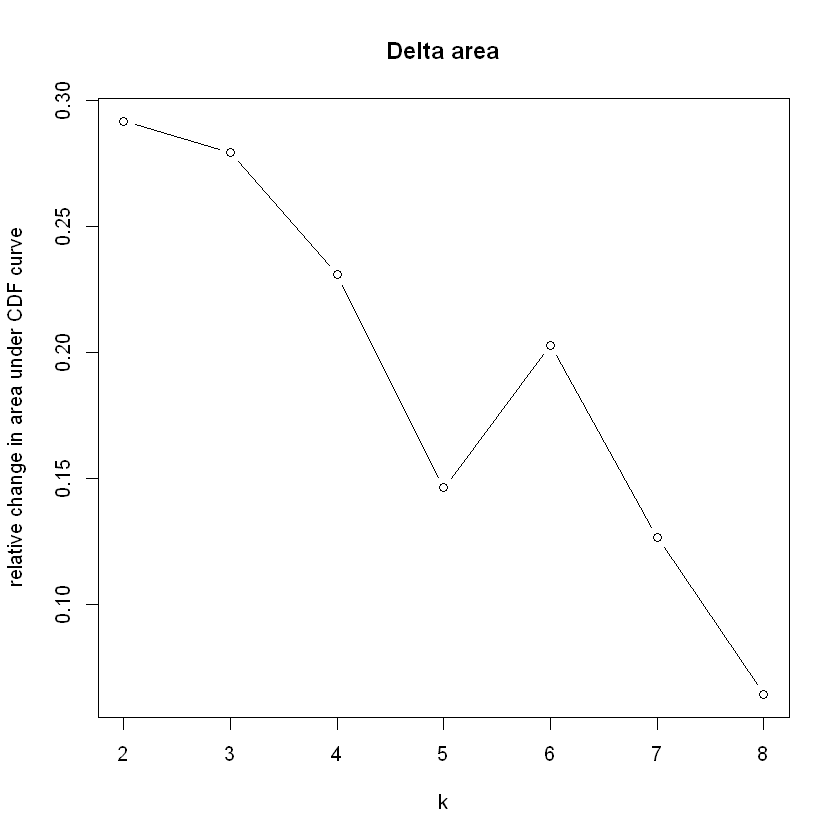

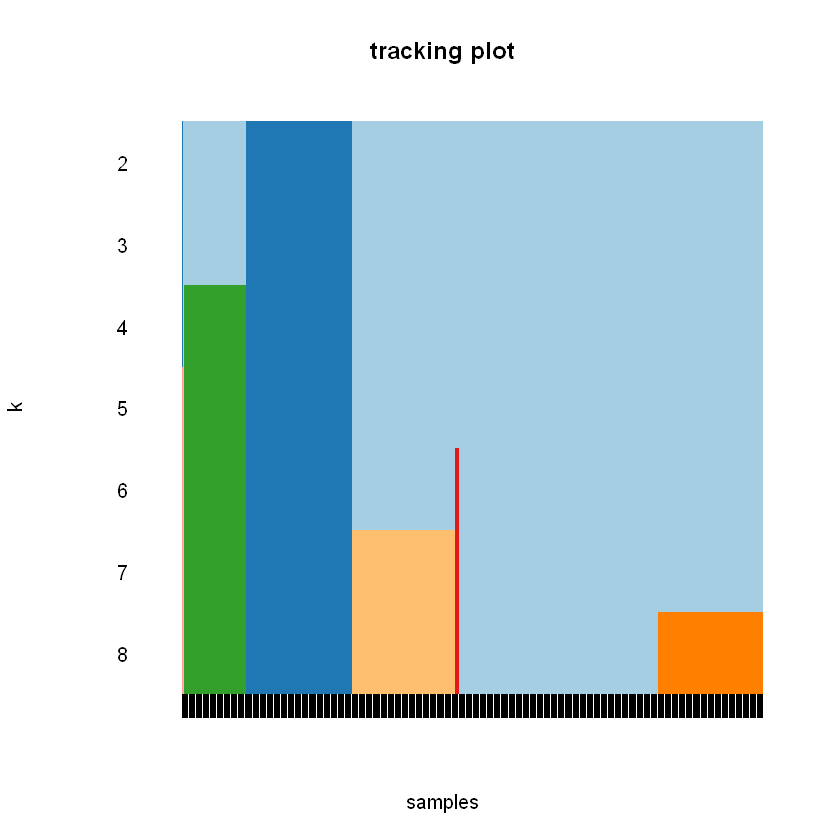

In [10]:
# ConsensusClusterPlus with hc - average linkage

chc.avg<-ConsensusClusterPlus(as.matrix(t(data[ii,hvf[1:5000]])),maxK=8,reps=100,pItem=.6,pFeature=0.3,distance="pearson",clusterAlg="hc", innerLinkage = "average", finalLinkage = "average")

In [12]:
c<-chc.avg[[3]]
mda::confusion(c$consensusClass,class[ii,])
c<-chc.avg[[5]]
mda::confusion(c$consensusClass,class[ii,])
c<-chc.avg[[6]]
mda::confusion(c$consensusClass,class[ii,])

         true
predicted BRCA COAD KIRC LUAD PRAD
        1  171   53    1   93   89
        2    0    0   92    0    0
        3    1    0    0    0    0

         true
predicted BRCA COAD KIRC LUAD PRAD
        1  171    0    1   93   89
        2    0    0   91    0    0
        3    0   53    0    0    0
        4    1    0    0    0    0
        5    0    0    1    0    0

         true
predicted BRCA COAD KIRC LUAD PRAD
        1  170    0    0   92   89
        2    0    0   91    0    0
        3    0   53    0    0    0
        4    1    0    1    1    0
        5    1    0    0    0    0
        6    0    0    1    0    0

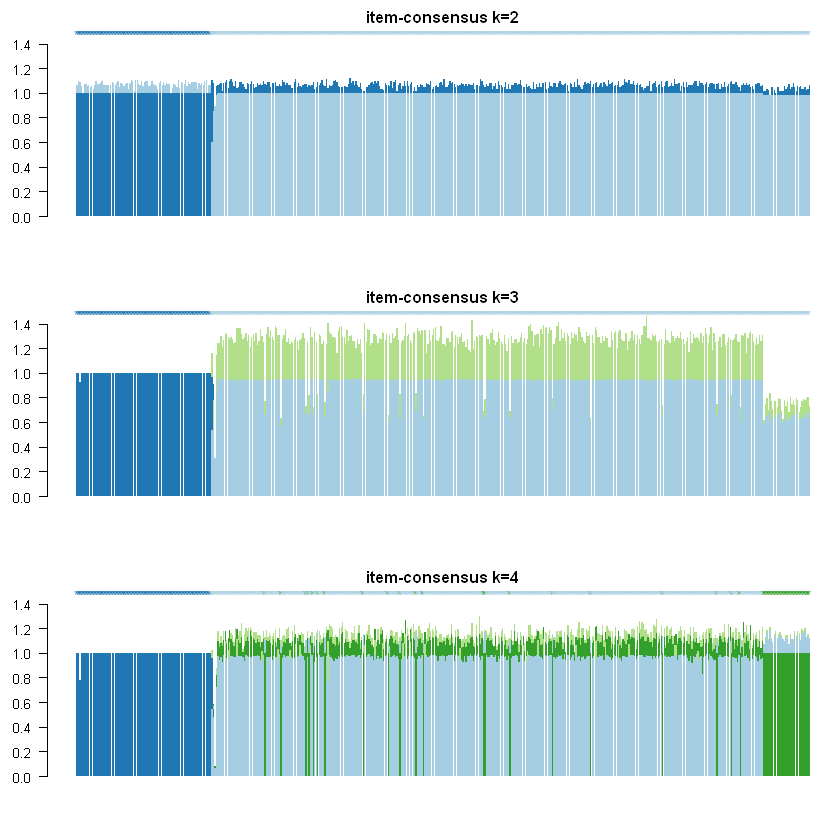

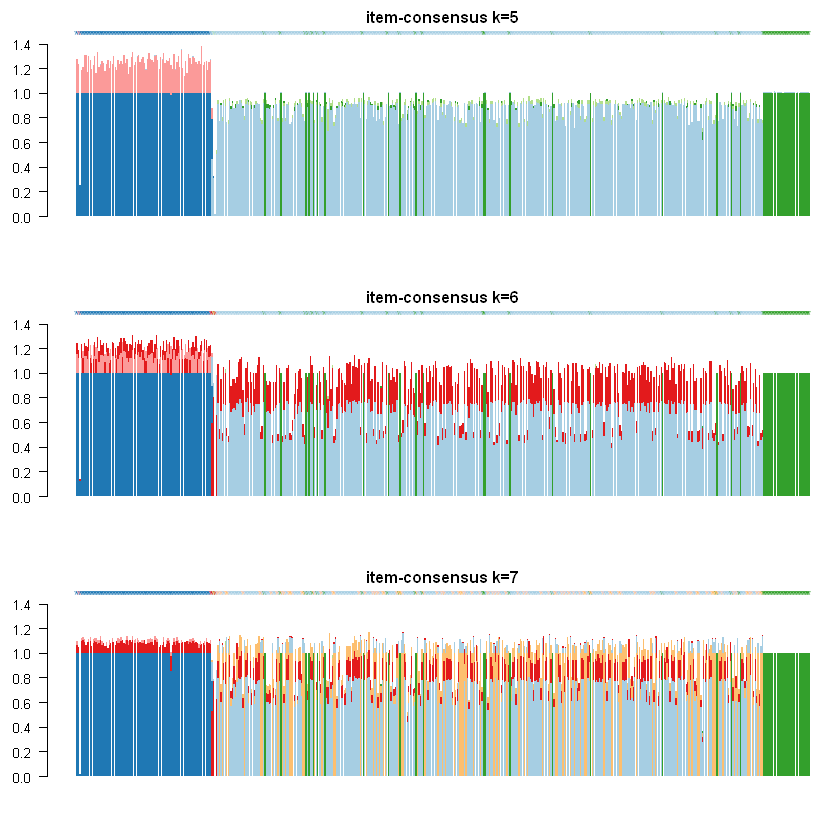

k,cluster,clusterConsensus
2,1,0.9945066
2,2,1.0000000
3,1,0.9030948
3,2,0.9984021
3,3,NaN
4,1,0.9634936
4,2,0.9951913
4,3,1.0000000
4,4,NaN
5,1,0.8635709


,k,cluster,item,itemConsensus
,<dbl>,<dbl>,<chr>,<dbl>
1,2,1,167,0.9852172
2,2,1,554,0.9843179
3,2,1,756,0.9795373
4,2,1,532,0.9843771
5,2,1,445,0.9842141


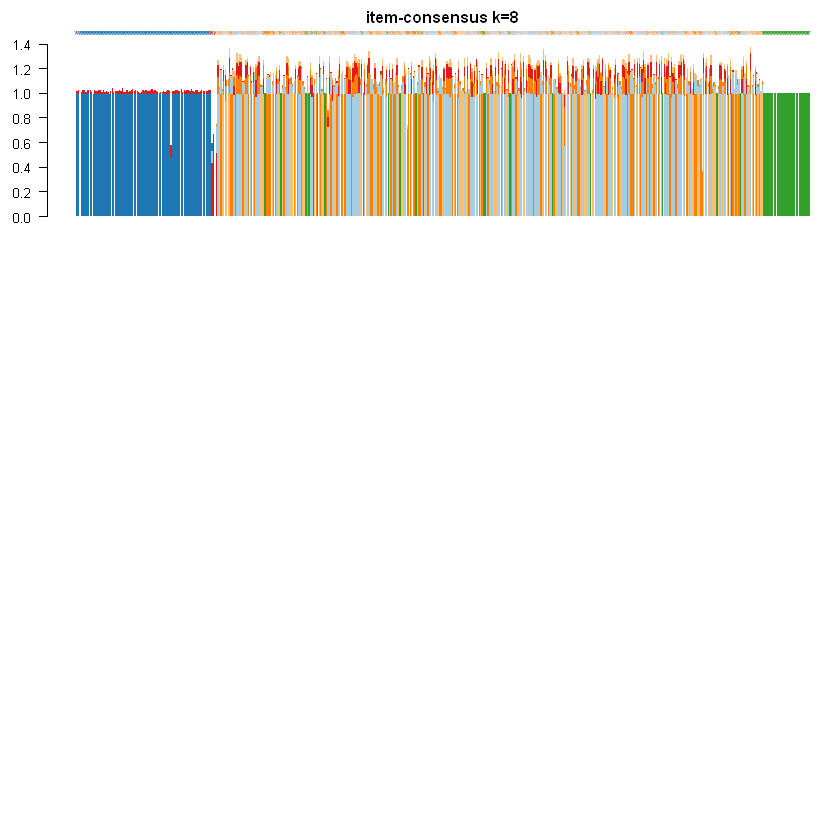

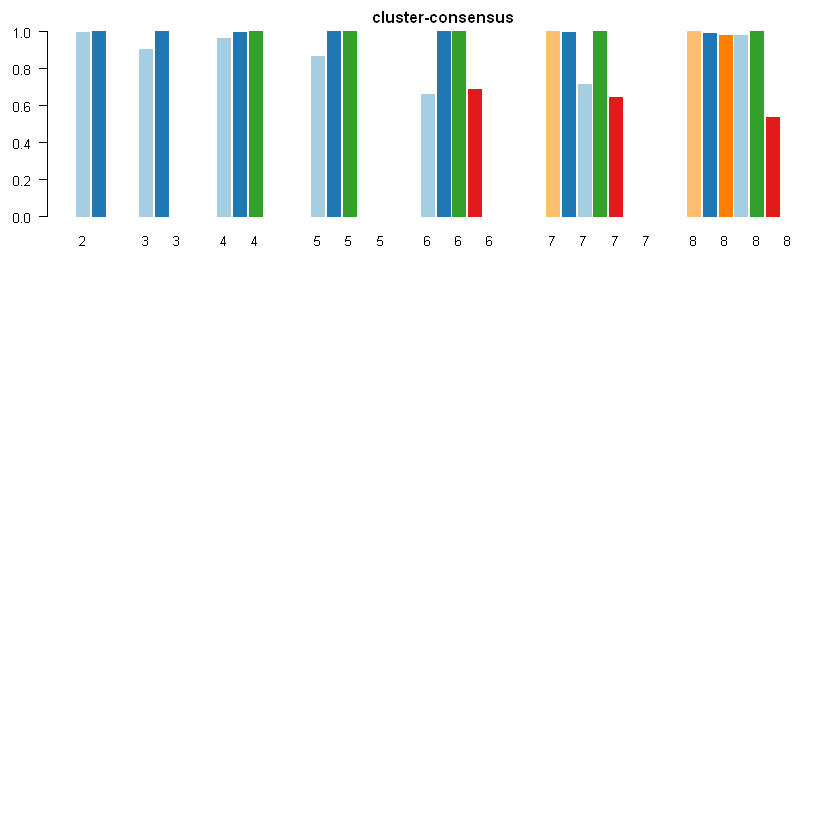

In [13]:
## Generating cluster and item consensus

icl.hc <- calcICL(chc.avg)

#  calcICL returns a list of two elements:
icl.hc[["clusterConsensus"]]

icl.hc[["itemConsensus"]][1:5,]

      K=2       K=3       K=4       K=5       K=6       K=7       K=8 
0.3414349 0.1760561 0.3952385 0.3420601 0.3300040 0.3343246 0.3064930 
[1] 3


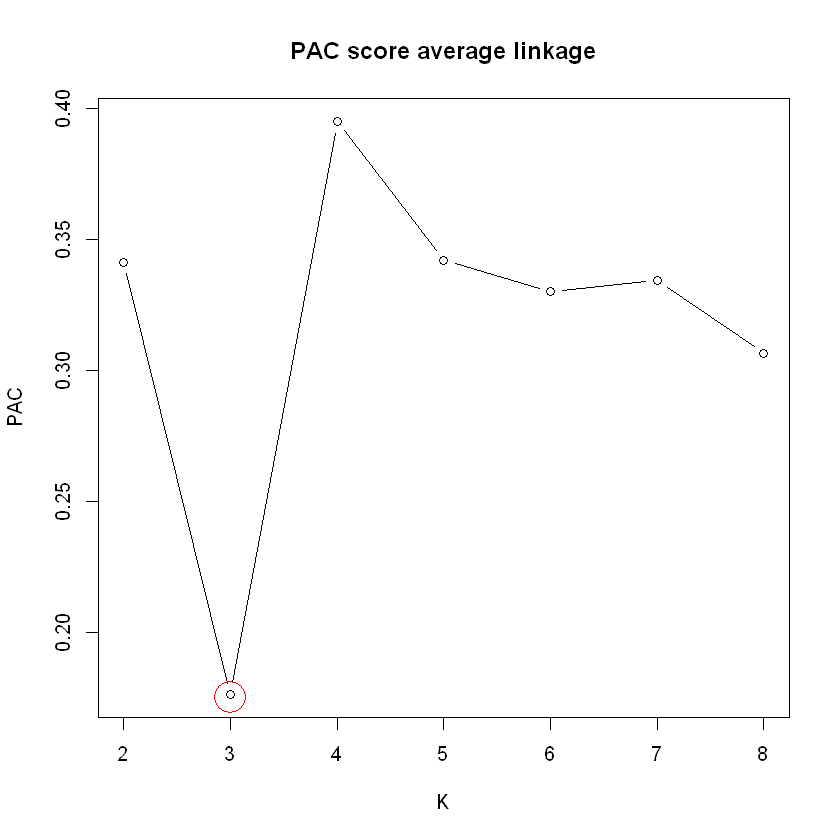

In [17]:
# PAC score computation for hc
maximum.K = 8
K = 2:maximum.K
x1 = 0.01; x2 = 0.99 
PAC = rep(NA,length(K)) 

names(PAC) = paste("K=",K,sep="") 

for(i in K){
  M = chc.avg[[i]]$consensusMatrix
  Fn = ecdf(M[lower.tri(M)])
  PAC[i-1] = Fn(x2) - Fn(x1)
}

# The optimal K
optK = K[which.min(PAC)]

print(PAC)
print(optK)
##############################


plot(c(2:8), PAC, type = "b", main = "PAC score average linkage", xlab = "K")
symbols(x=c(3), y=c(0.175), circles=0.15, add=T, inches=F, fg = "red")

end fraction

clustered

clustered



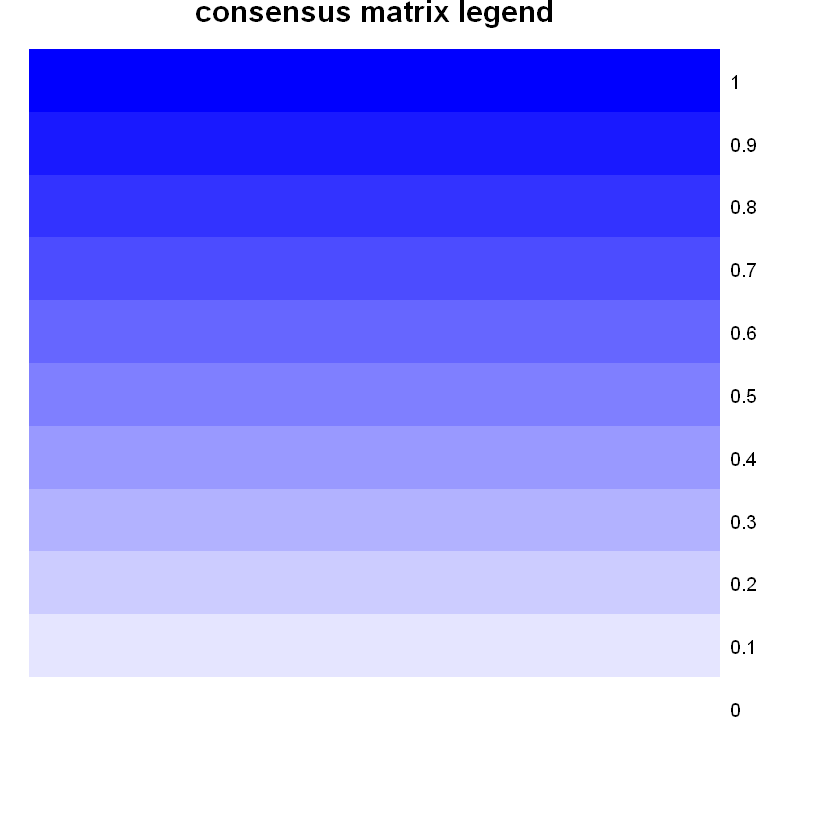

clustered



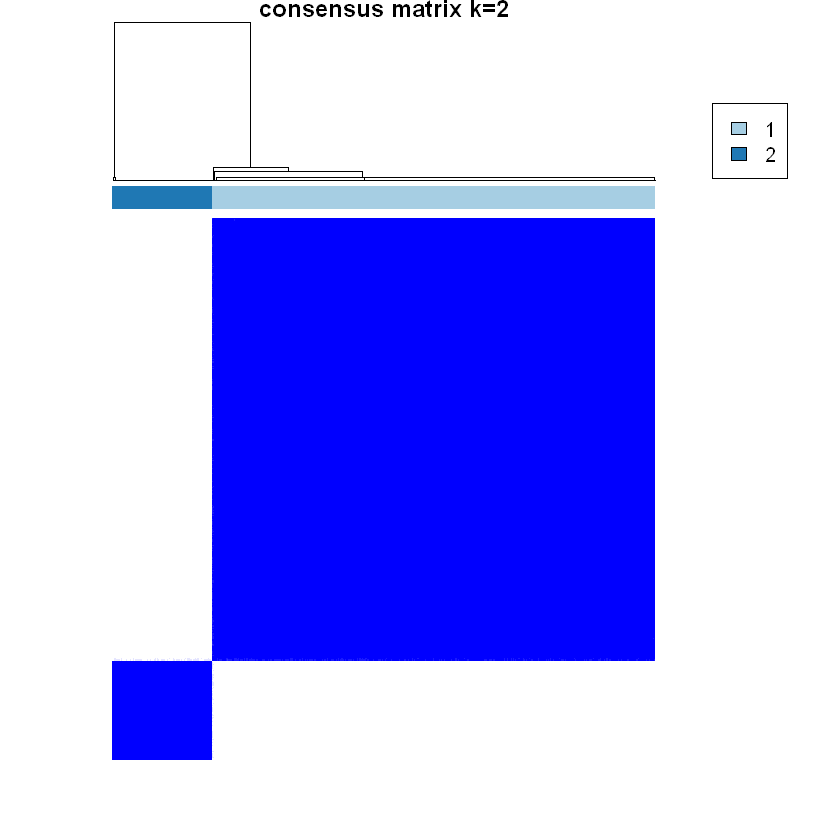

clustered



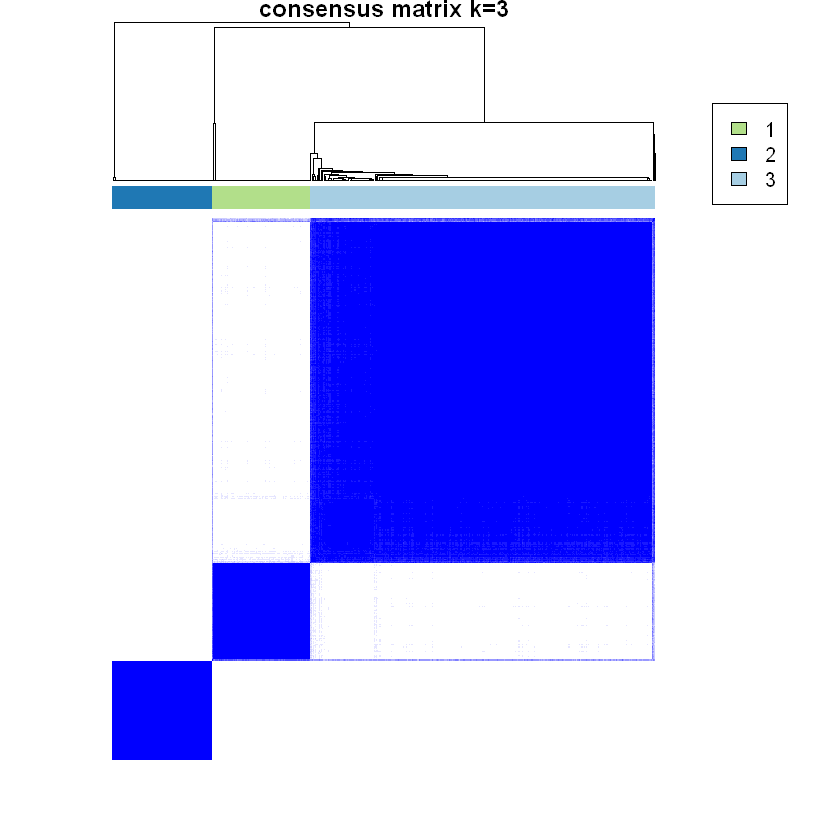

clustered



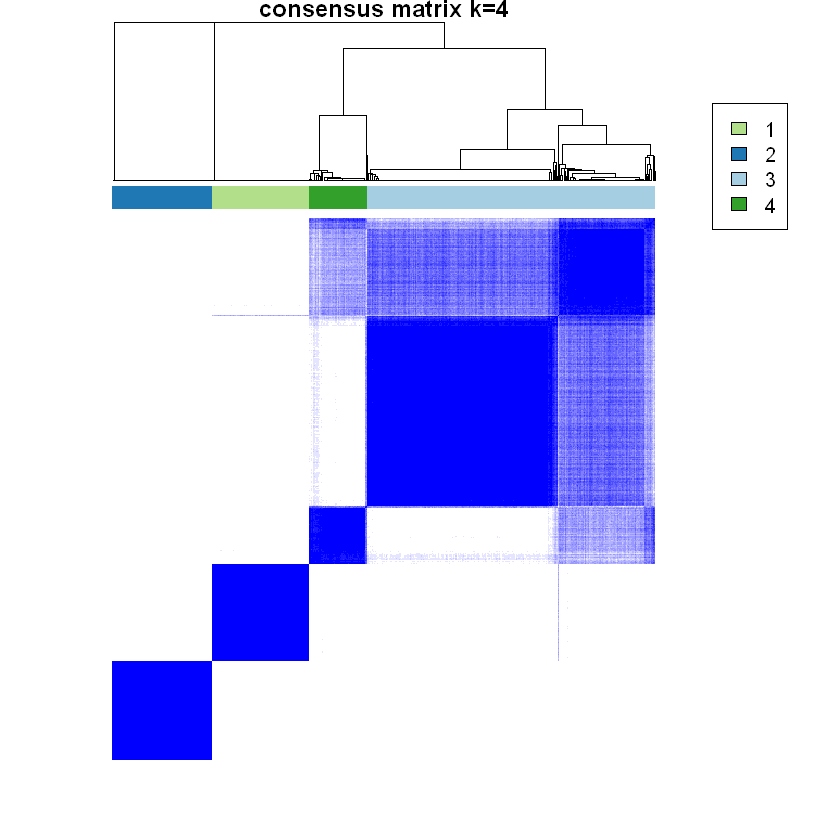

clustered



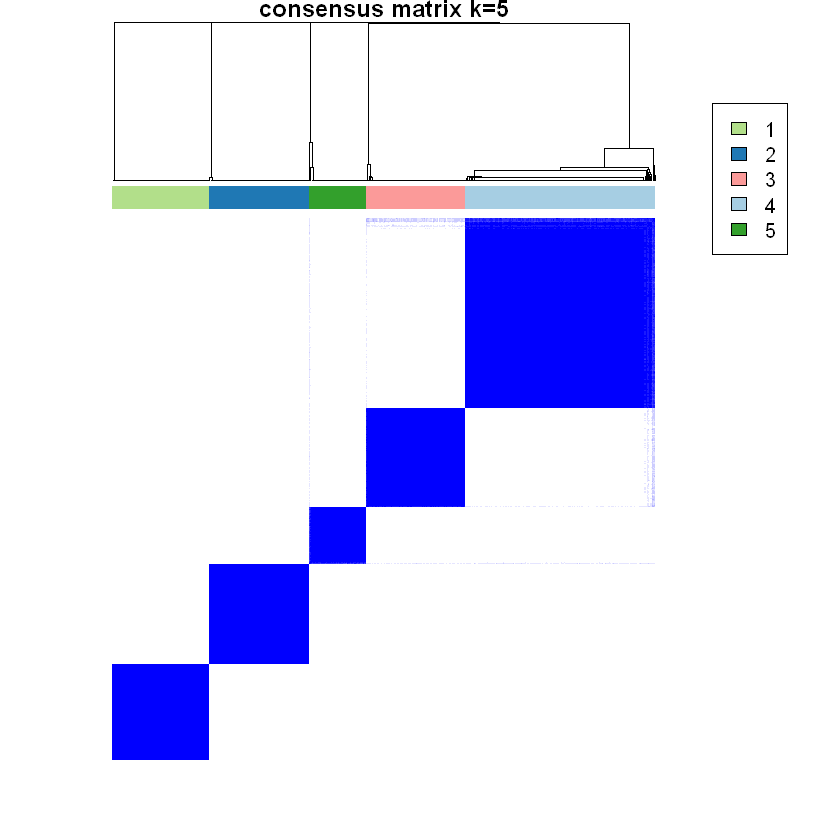

clustered



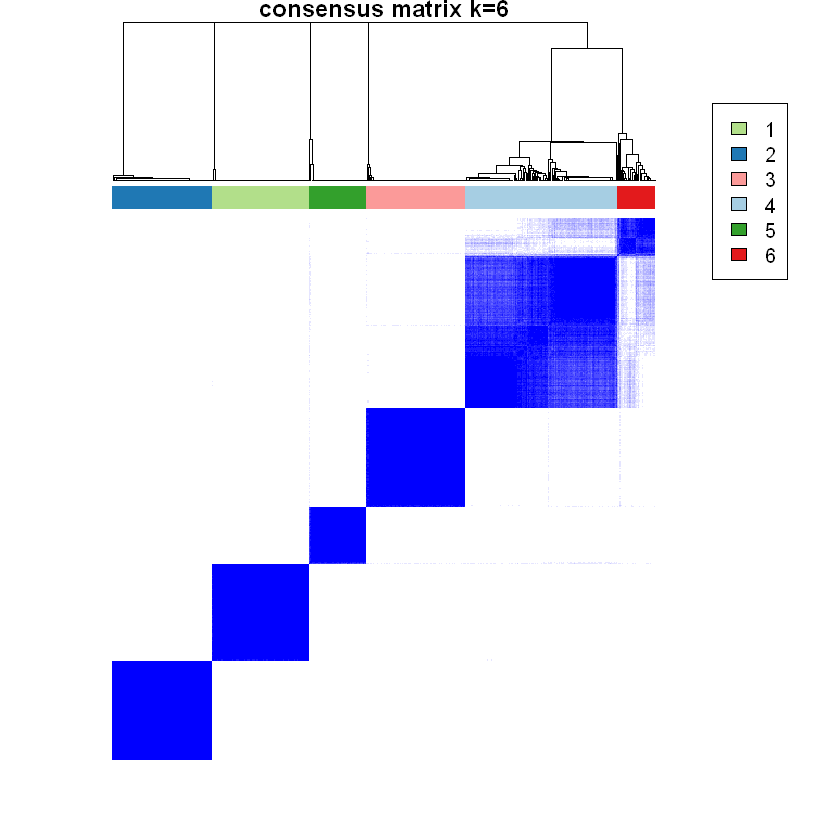

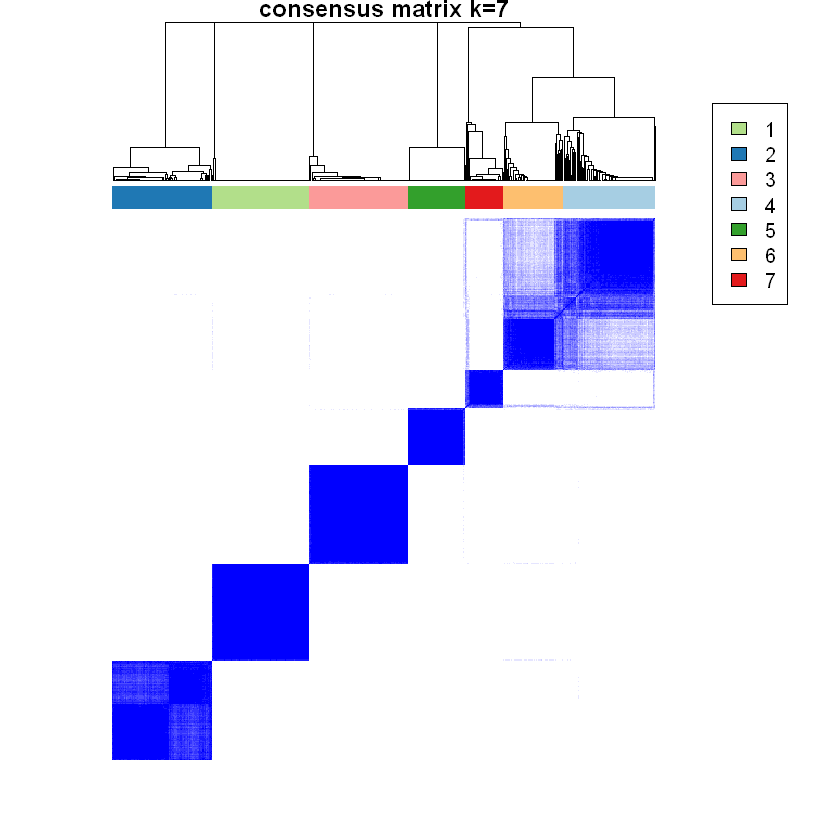

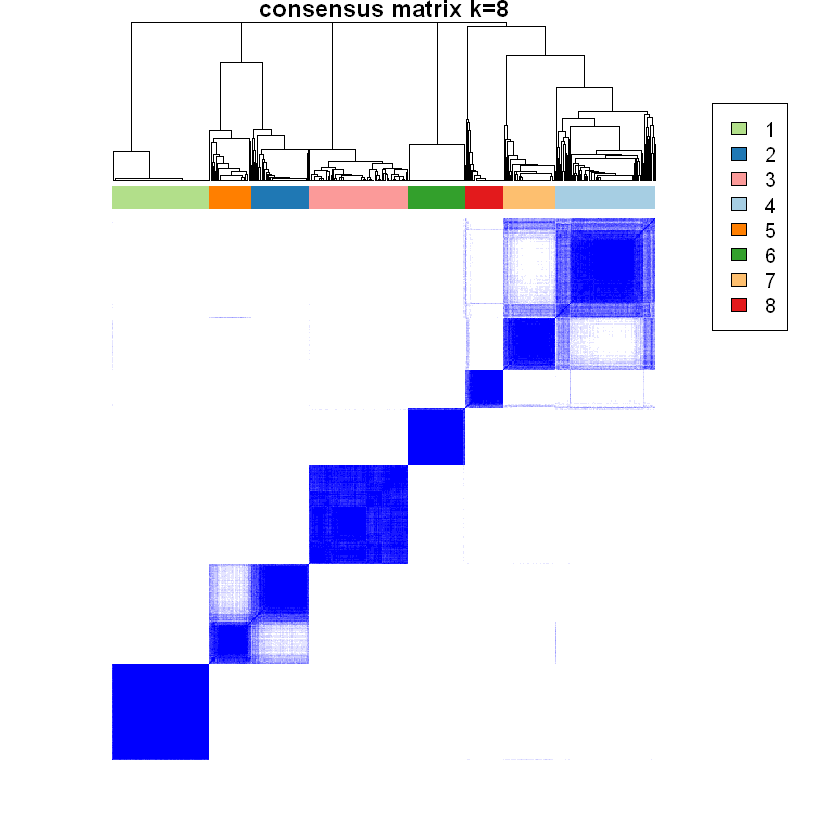

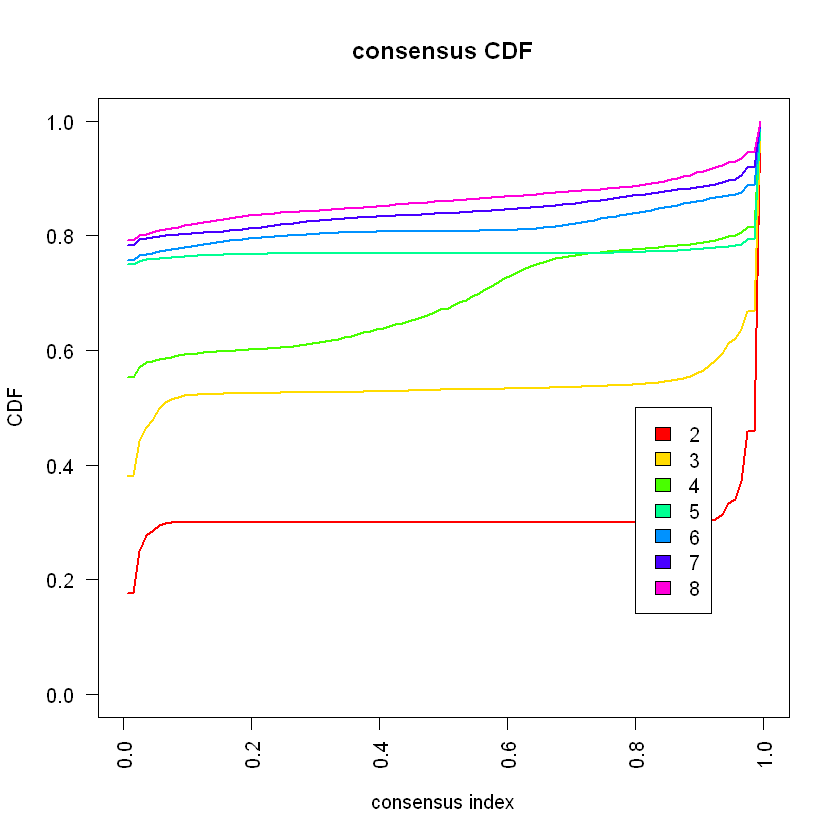

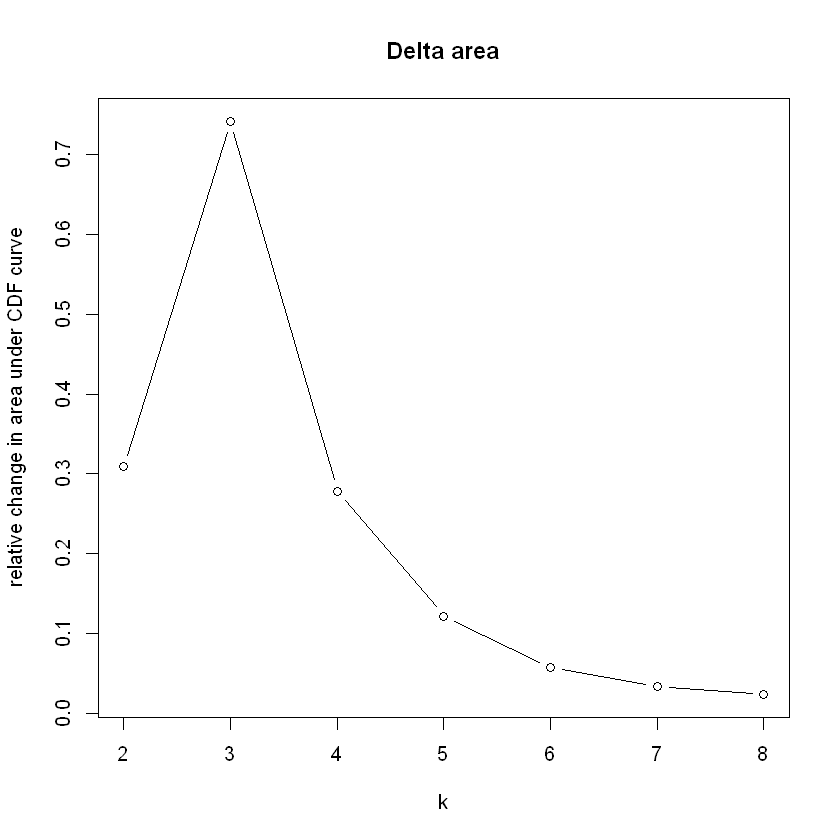

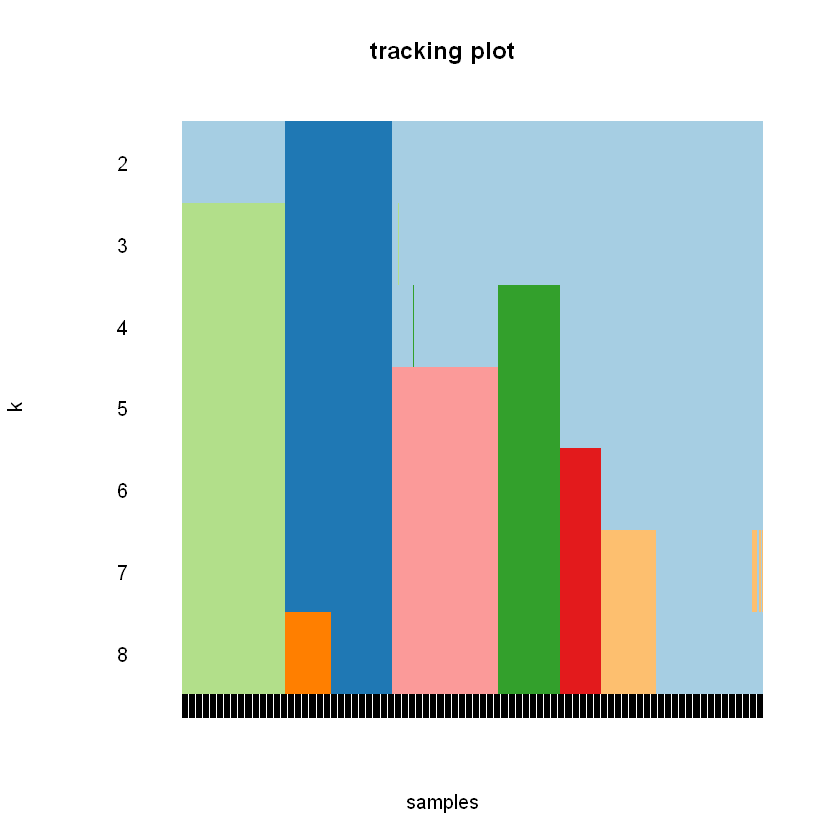

In [18]:
# ConsensusClusterPlus with pam


cpam<-ConsensusClusterPlus(as.matrix(t(data[ii,hvf[1:5000]])),maxK=8,reps=100,pItem=.6,pFeature=.3,distance="euclidean",clusterAlg="pam")

       K=2        K=3        K=4        K=5        K=6        K=7        K=8 
0.28274148 0.28793587 0.26114629 0.04343086 0.12990782 0.13580762 0.15373948 
[1] 5


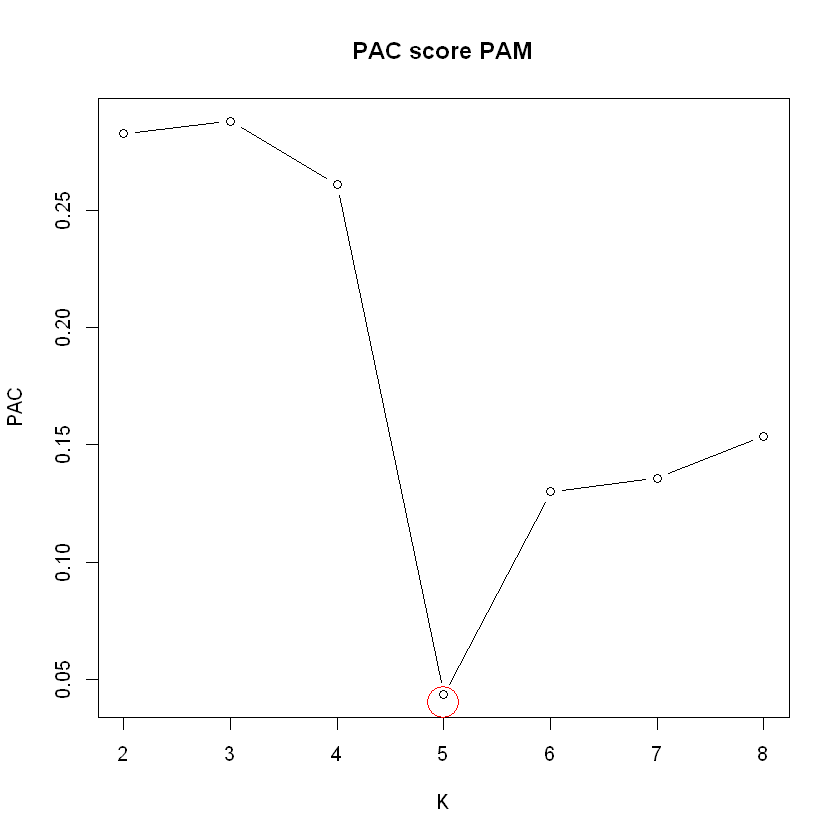

In [21]:

maximum.K = 8                  
K = 2:maximum.K              
x1 = 0.01; x2 = 0.99       
PAC = rep(NA,length(K)) 


names(PAC) = paste("K=",K,sep="") 

# NOTE: The PAC score is defined as F(x2) - F(x1) where F(x) is the CDF of the consensus matrix.

for(i in K){
  M = cpam[[i]]$consensusMatrix     
  Fn = ecdf(M[lower.tri(M)])        
  PAC[i-1] = Fn(x2) - Fn(x1)        
}

# The optimal K
optK = K[which.min(PAC)]

print(PAC)
print(optK)

plot(c(2:8), PAC, type = "b", main = "PAC score PAM", xlab = "K")
symbols(x=c(5), y=c(0.04), circles=0.15, add=T, inches=F, fg = "red")

end fraction

clustered

clustered



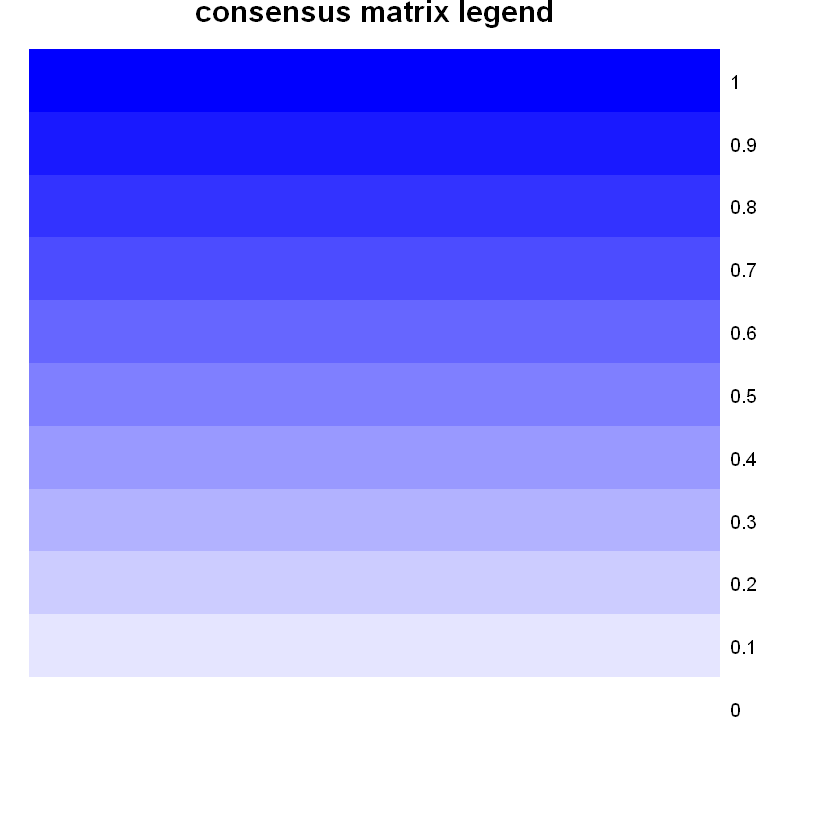

clustered



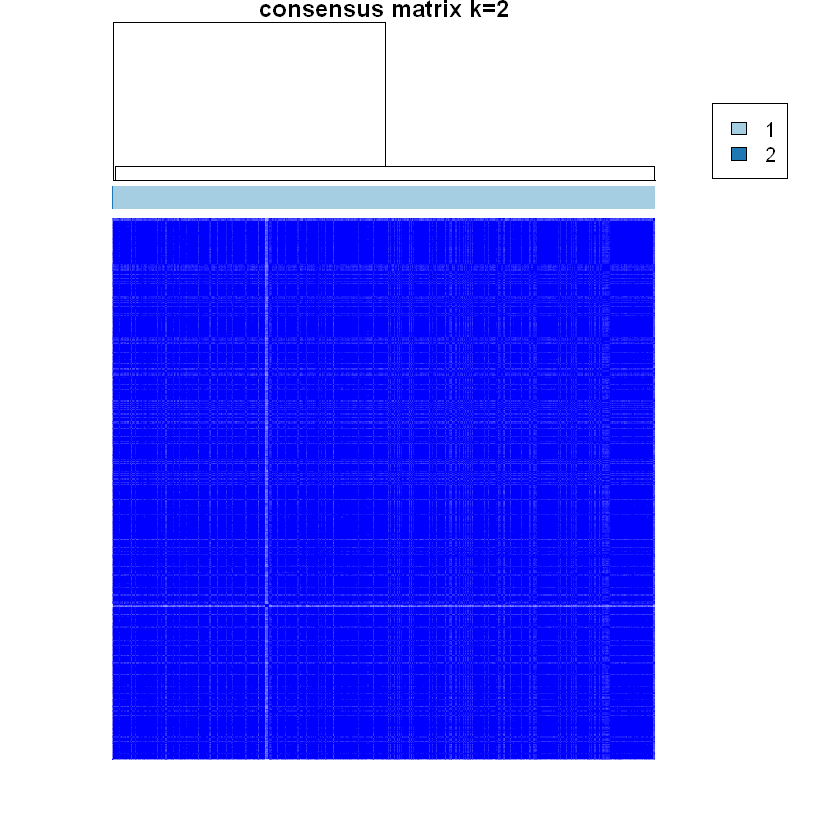

clustered



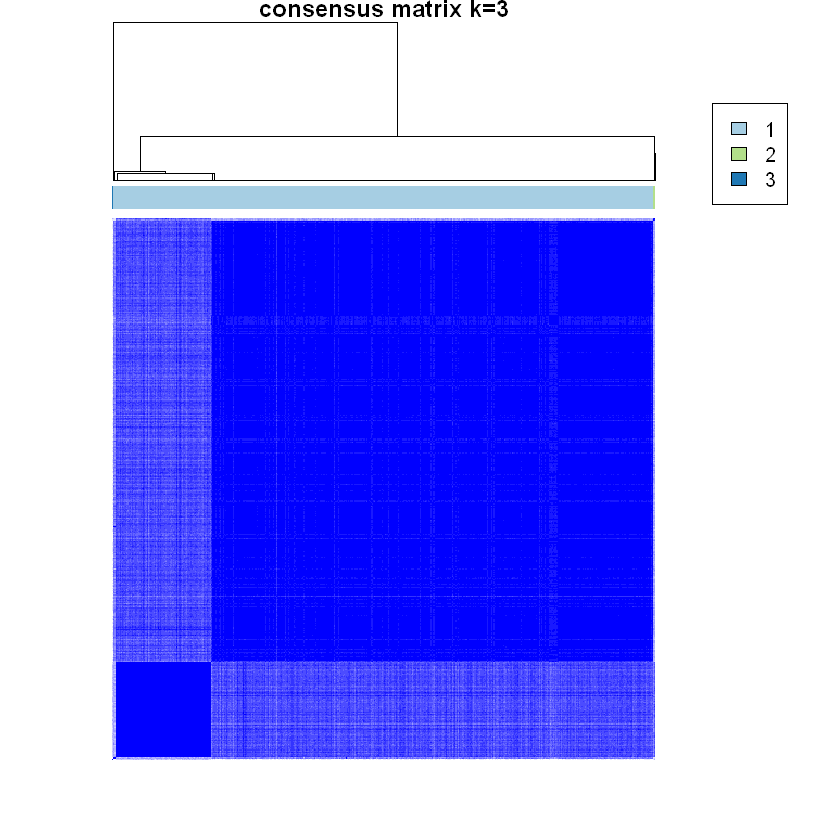

clustered



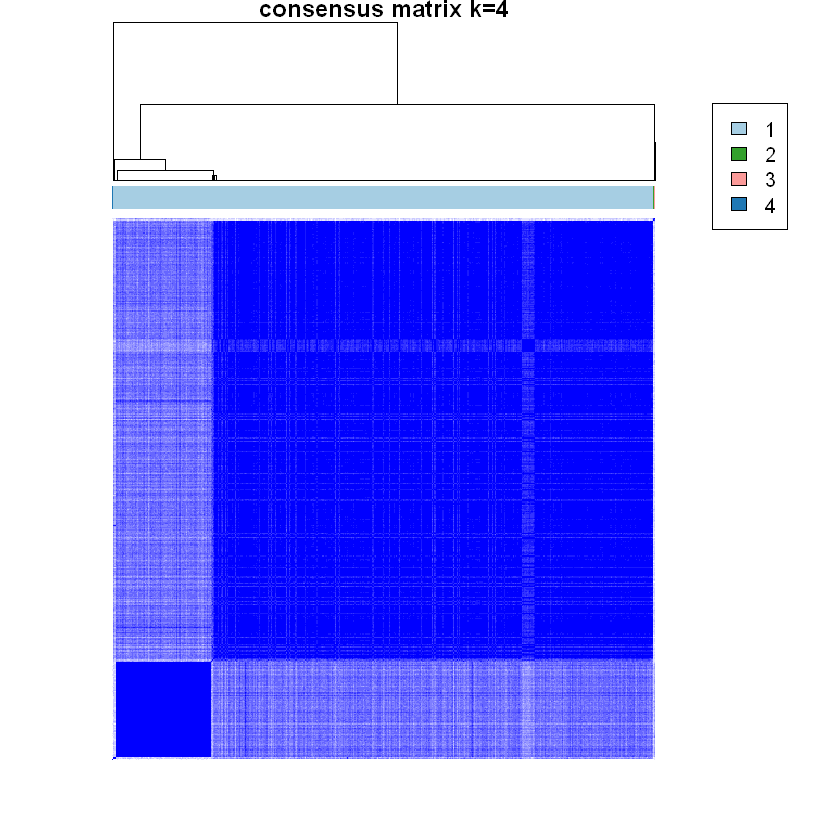

clustered



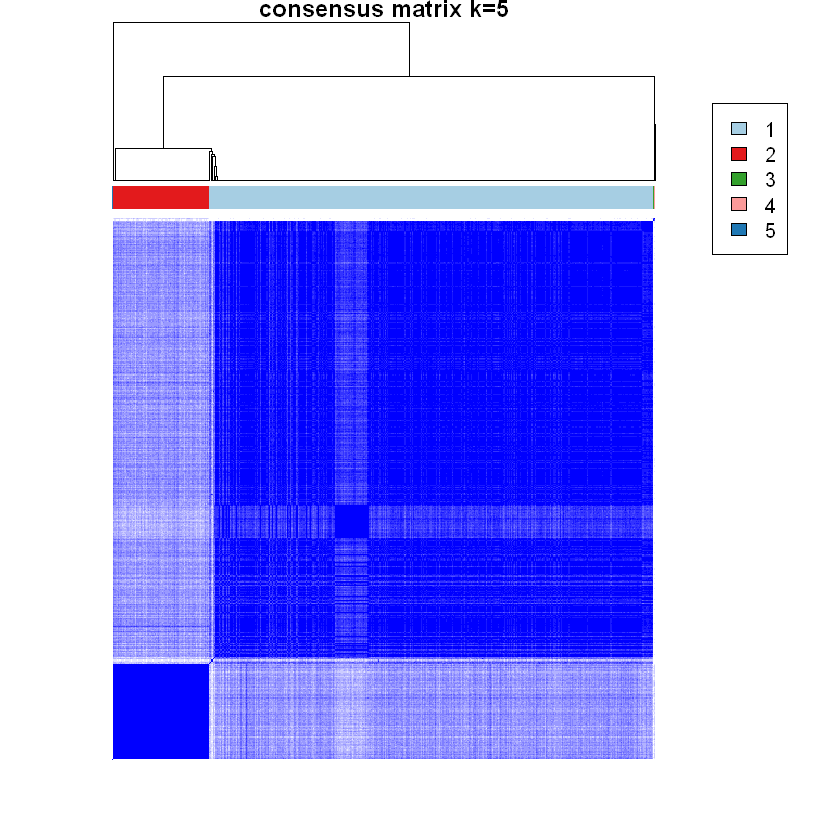

clustered



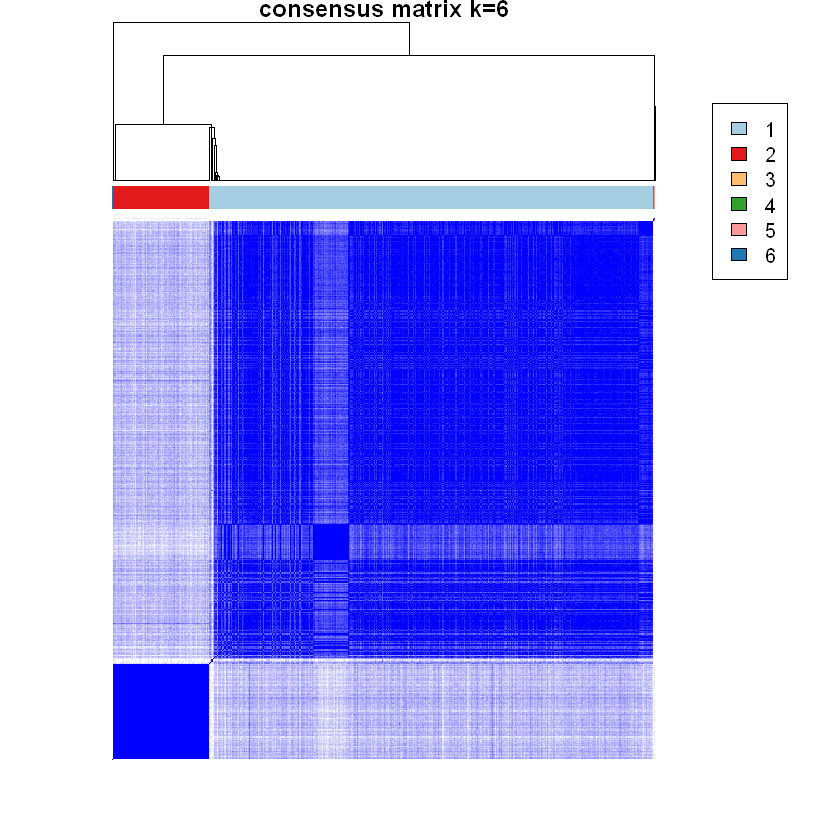

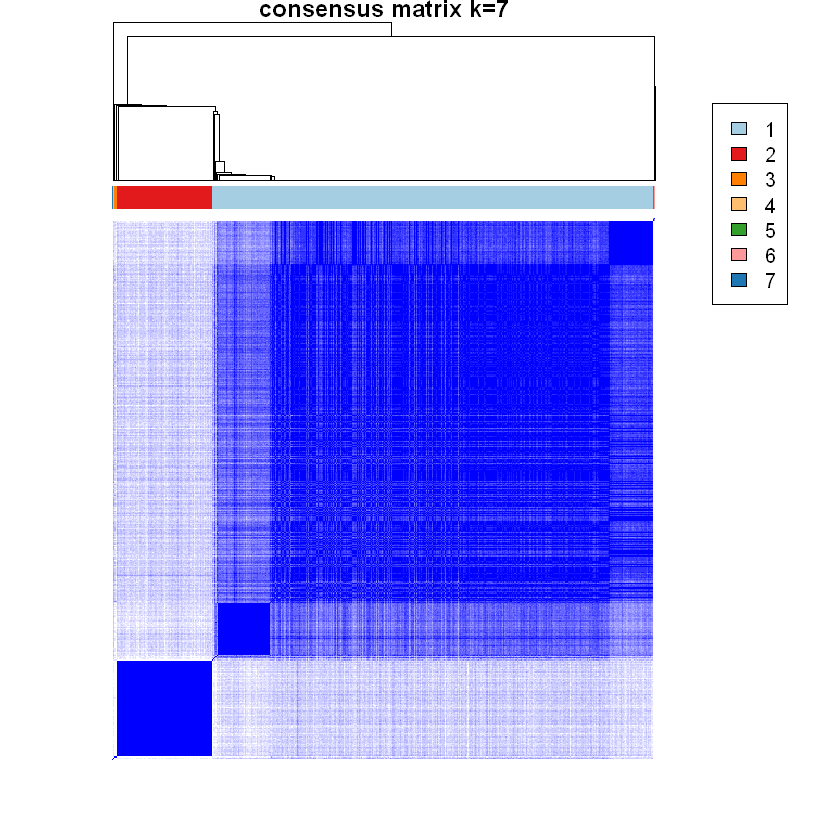

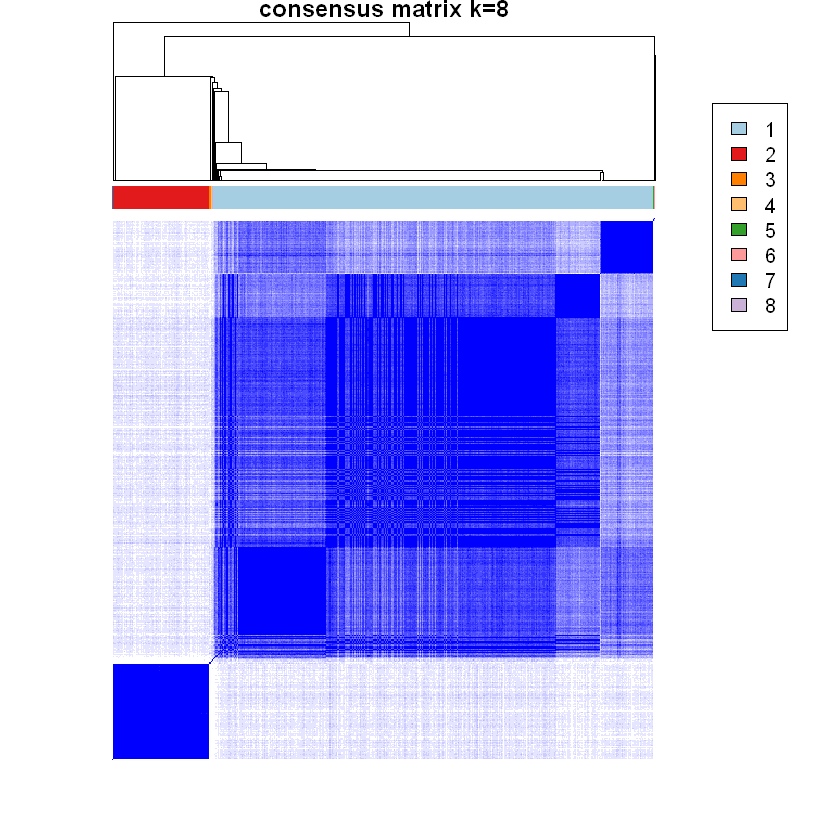

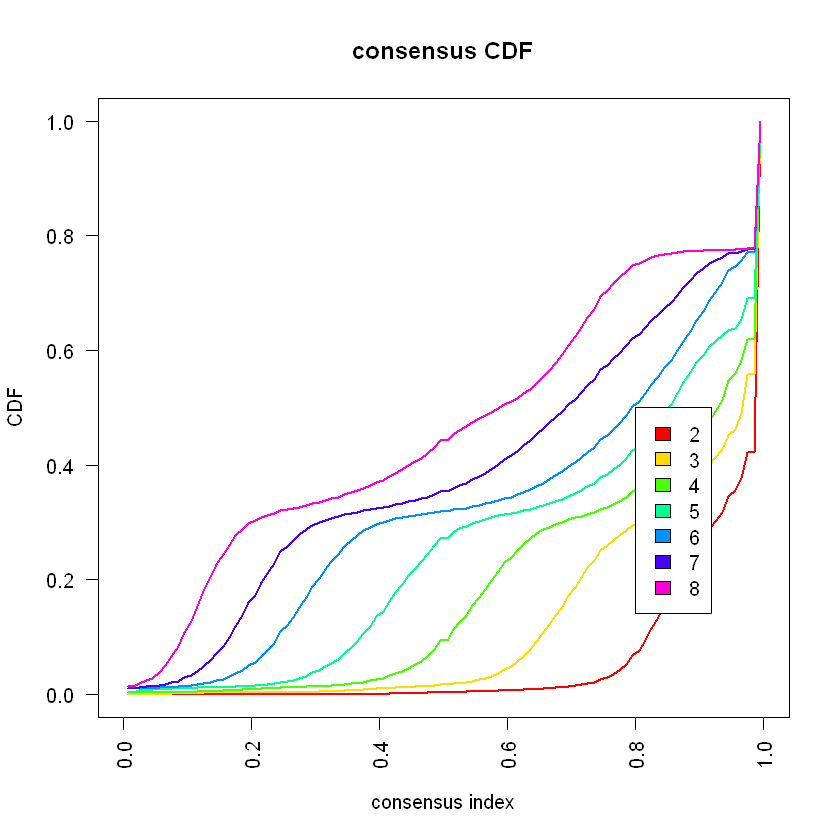

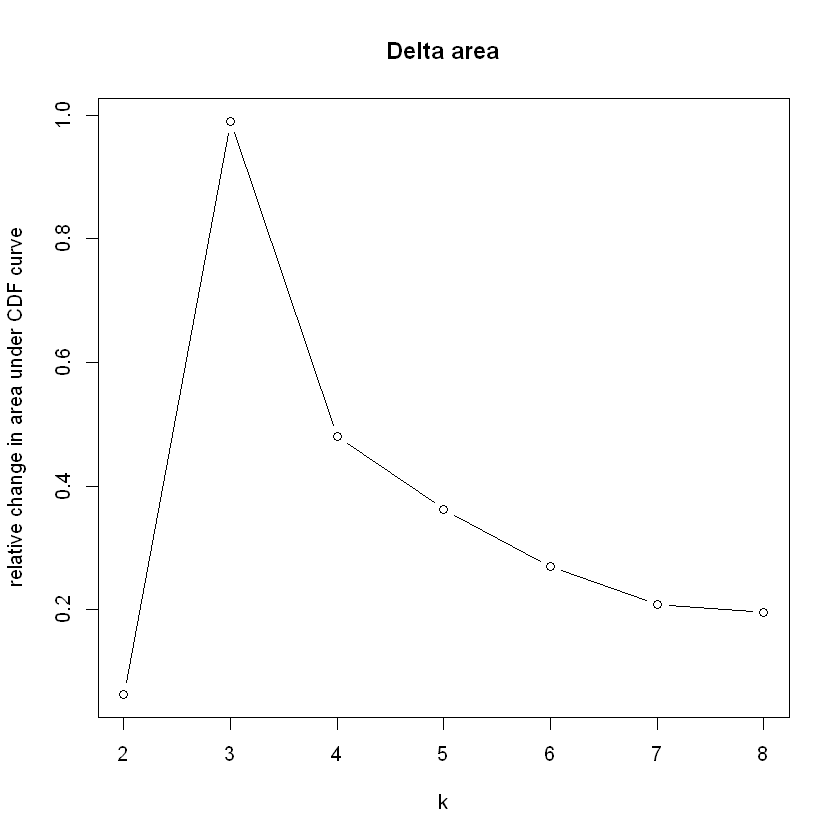

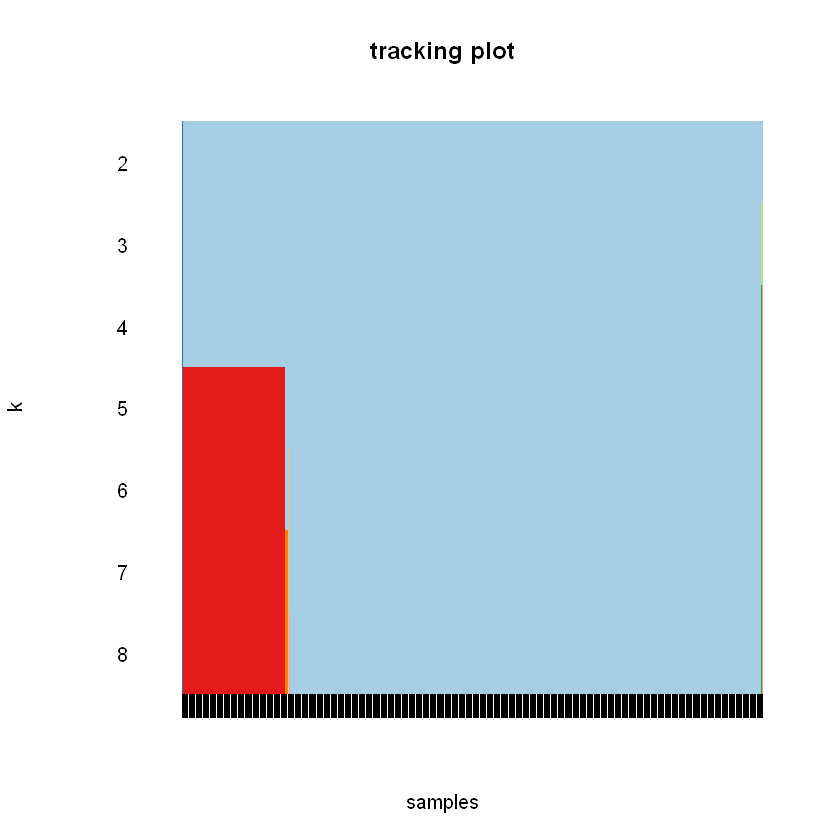

In [27]:
# ConsensusClusterPlus with hc - single linkage
ii<-sample(seq(1,801),500)
chc.sing<-ConsensusClusterPlus(as.matrix(t(data[ii,hvf[1:5000]])),maxK=8,reps=100,pItem=.6,pFeature=0.3,distance="pearson",clusterAlg="hc", innerLinkage = "single", finalLinkage = "single")

      K=2       K=3       K=4       K=5       K=6       K=7       K=8 
0.4225331 0.5590942 0.6164970 0.6870541 0.7598557 0.7654749 0.7645291 
[1] 2


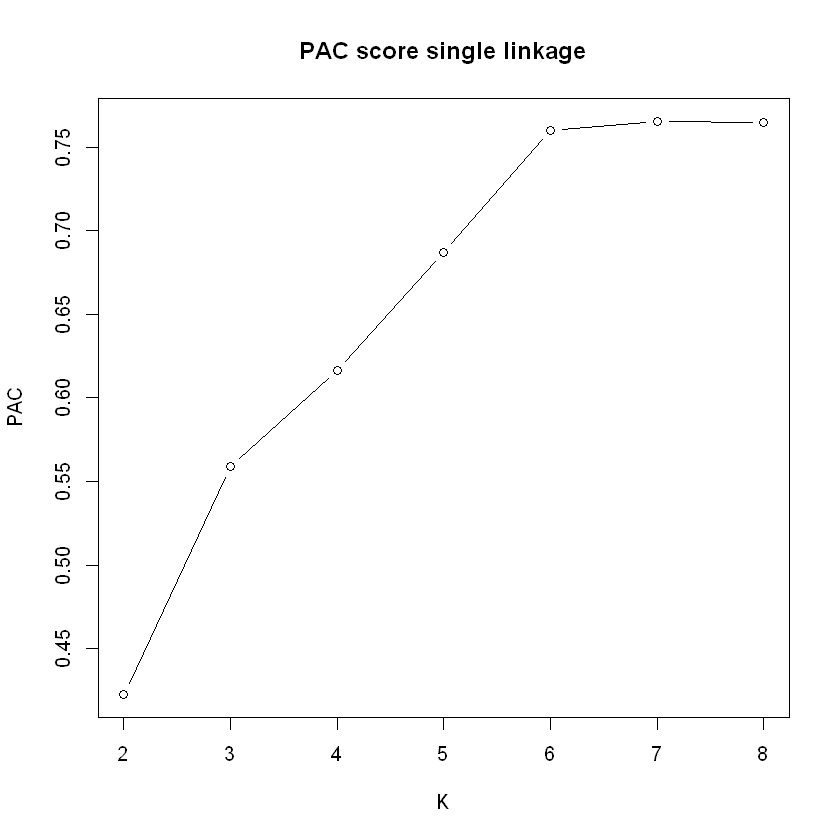

In [28]:
# PAC score computation for hc
maximum.K = 8
K = 2:maximum.K
x1 = 0.01; x2 = 0.99 
PAC = rep(NA,length(K)) 

names(PAC) = paste("K=",K,sep="") 

for(i in K){
  M = chc.sing[[i]]$consensusMatrix
  Fn = ecdf(M[lower.tri(M)])
  PAC[i-1] = Fn(x2) - Fn(x1)
}

# The optimal K
optK = K[which.min(PAC)]

print(PAC)
print(optK)
##############################


plot(c(2:8), PAC, type = "b", main = "PAC score single linkage", xlab = "K")
#symbols(x=c(7), y=c(0.27), circles=0.15, add=T, inches=F, fg = "red")

end fraction

clustered

clustered



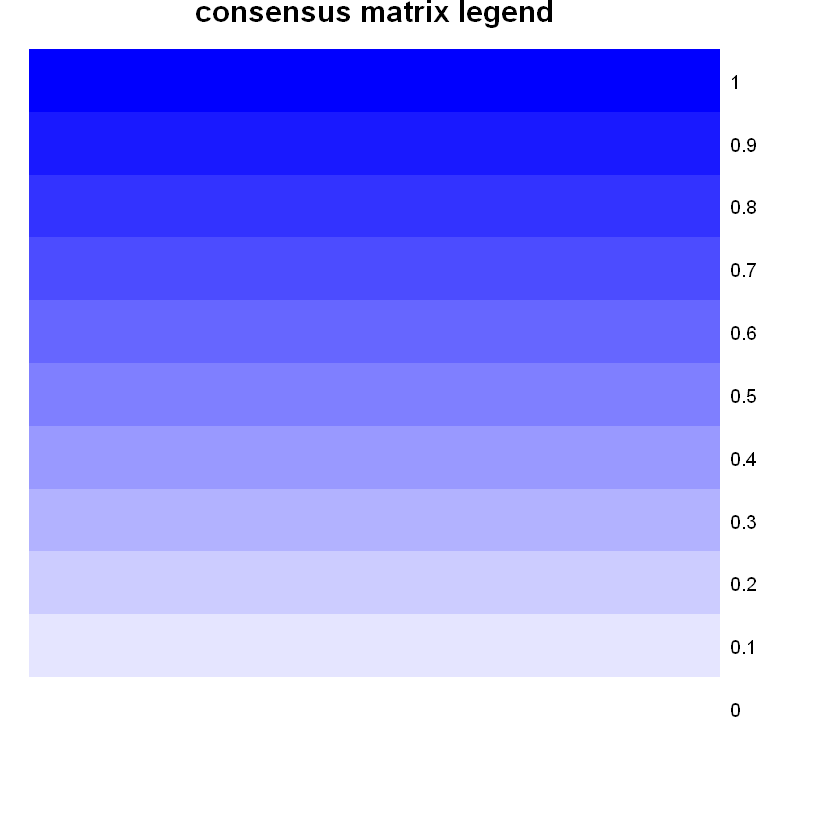

clustered



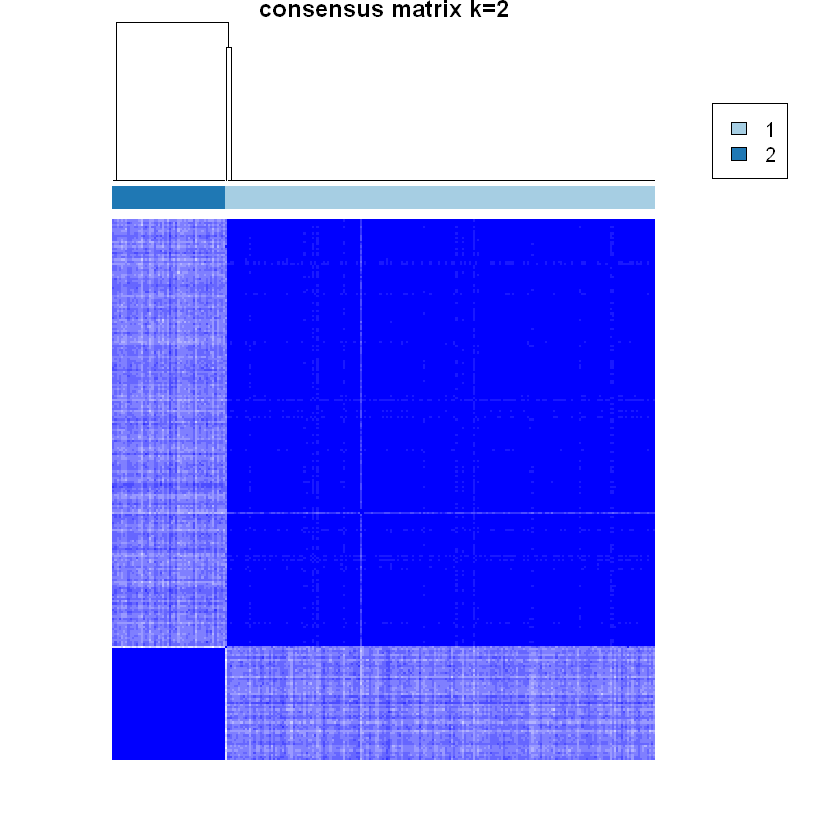

clustered



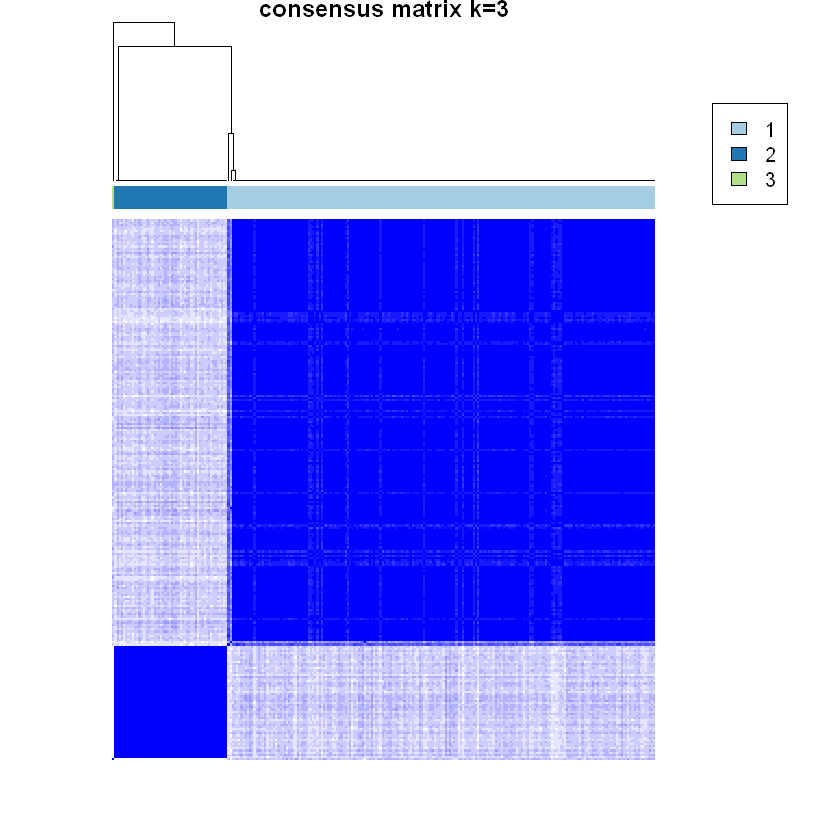

clustered



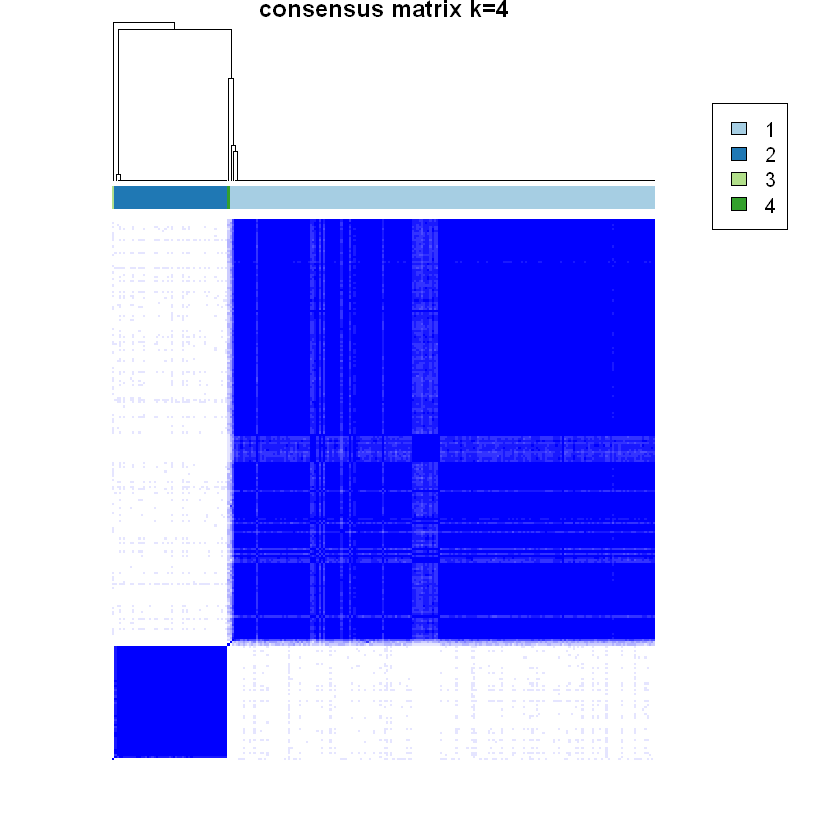

clustered



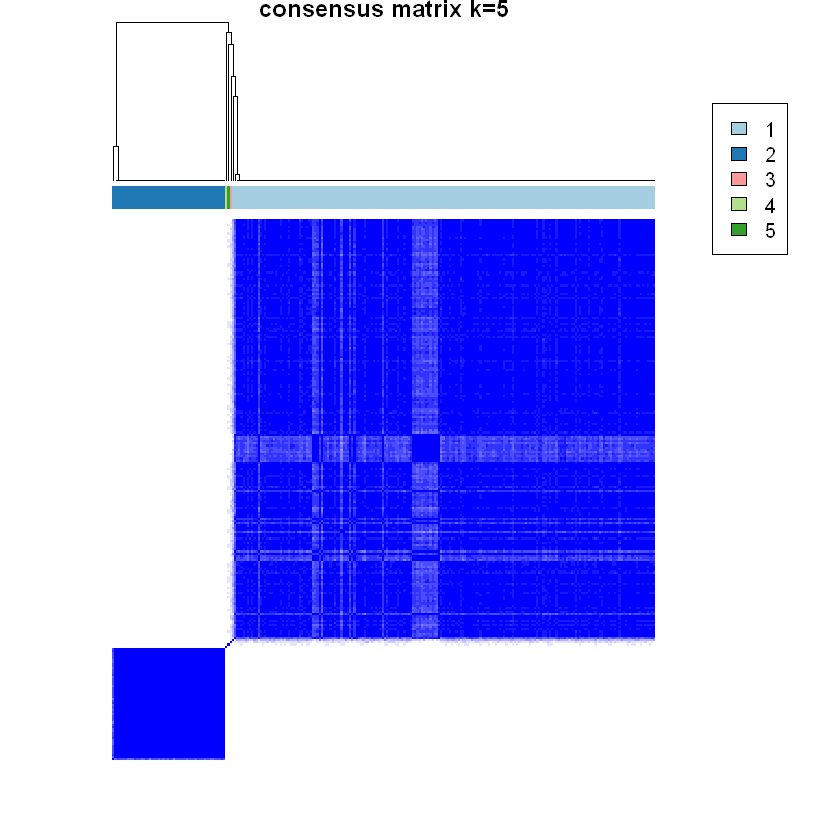

clustered



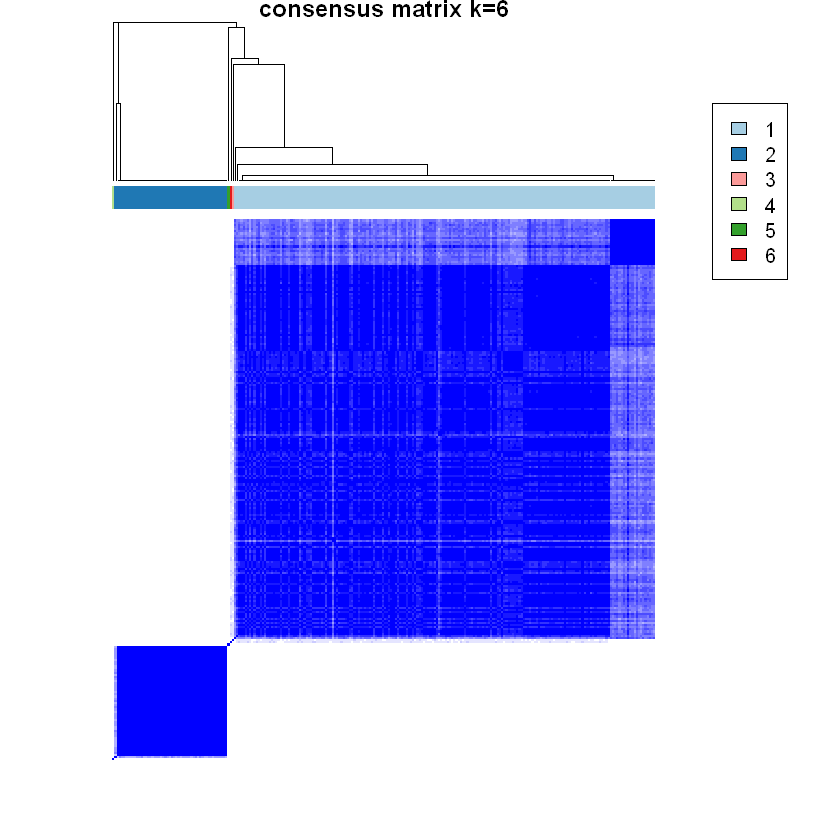

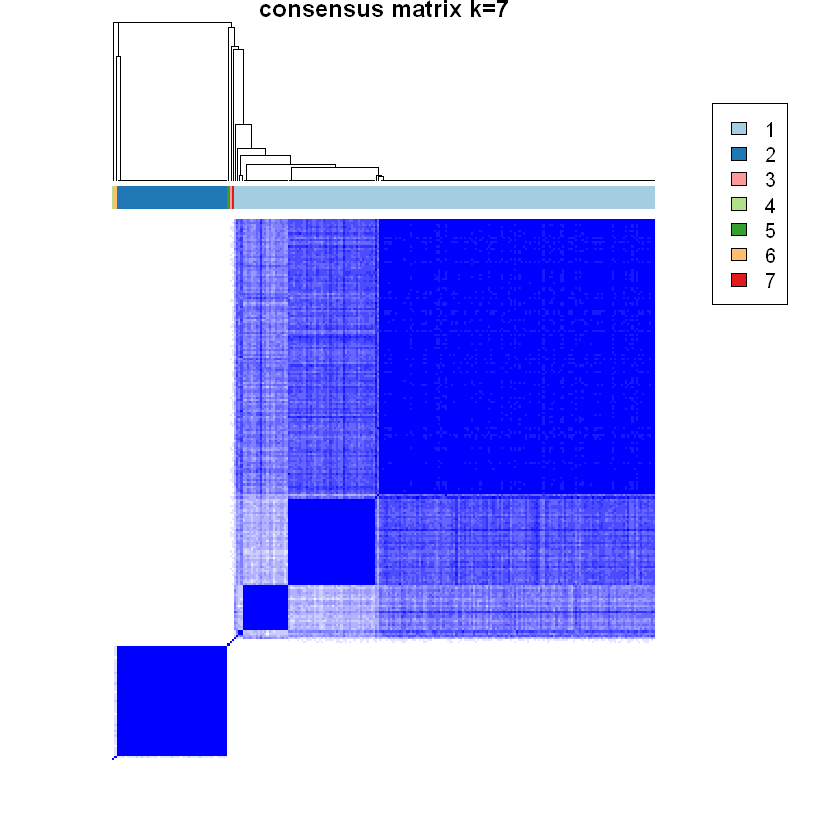

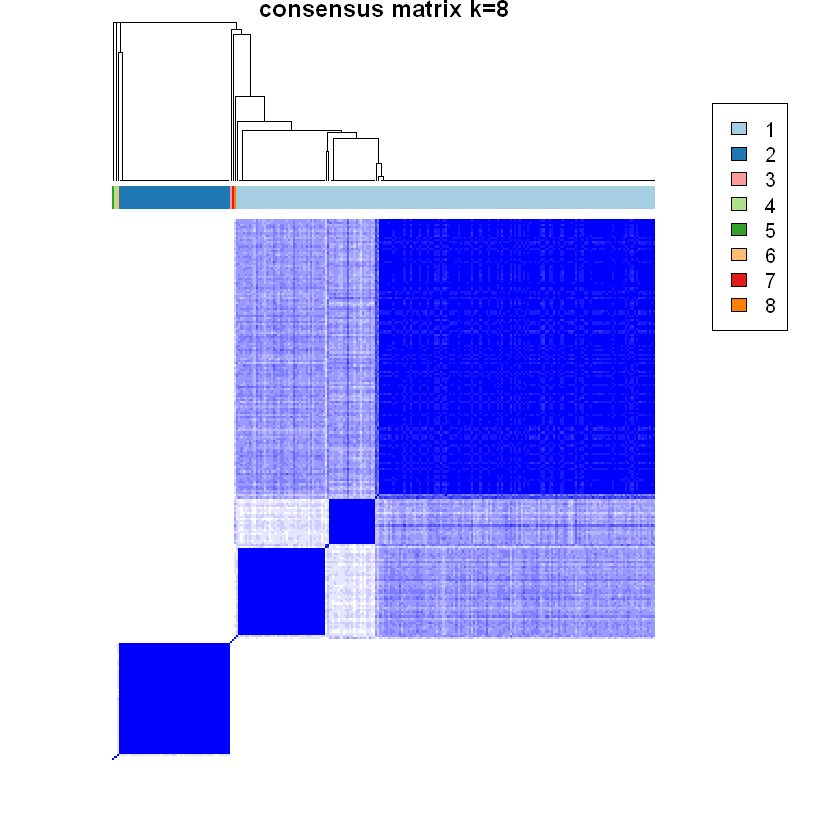

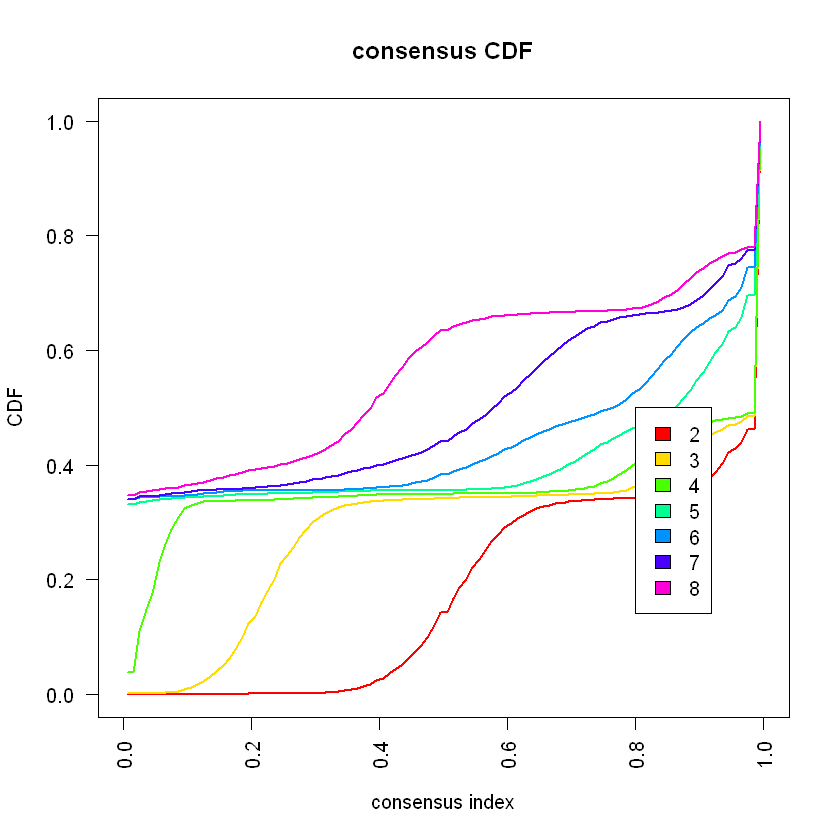

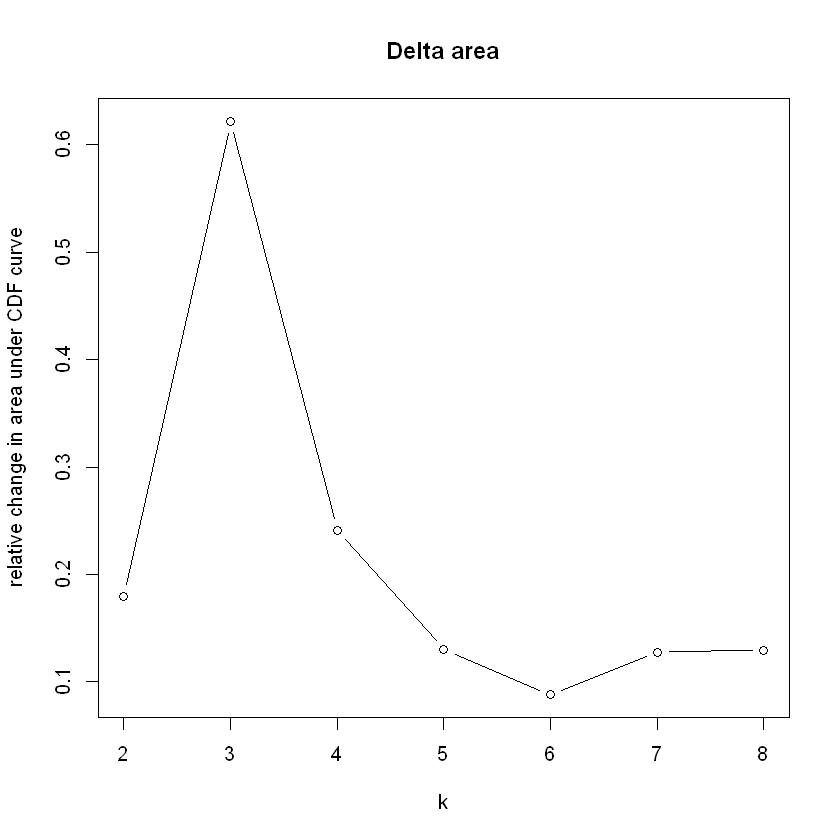

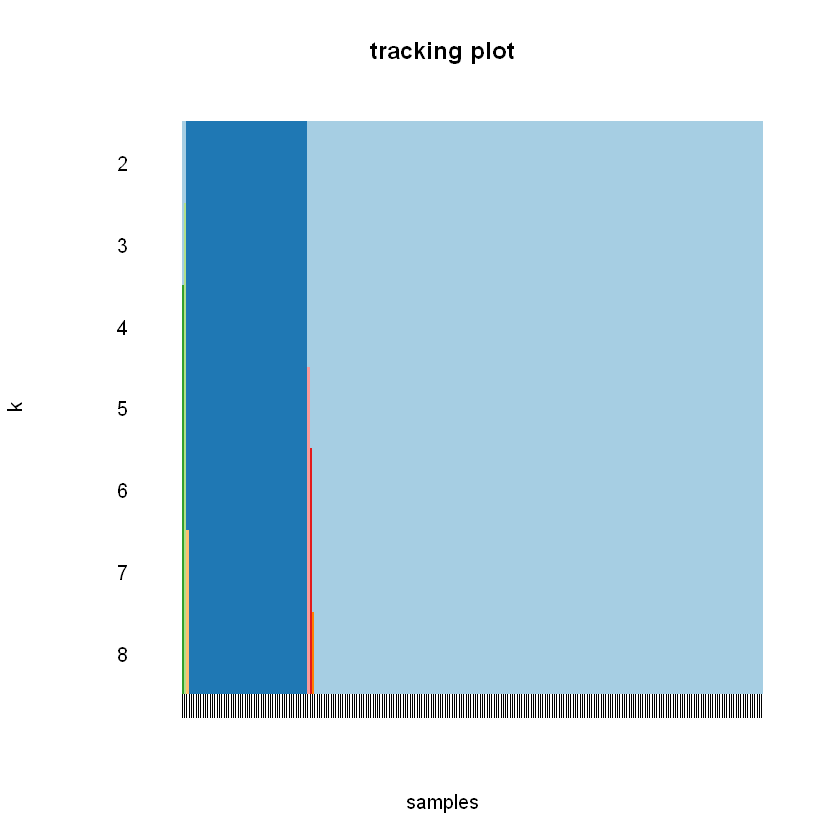

In [41]:
# ConsensusClusterPlus with hc - single linkage

ii<-sample(seq(1,801),250)

chc.sing<-ConsensusClusterPlus(as.matrix(t(data[ii,hvf[1:5000]])),maxK=8,reps=100,pItem=0.6,pFeature=0.6,distance="pearson",clusterAlg="hc", innerLinkage = "single", finalLinkage = "single")

      K=2       K=3       K=4       K=5       K=6       K=7       K=8 
0.4632932 0.4826345 0.4518233 0.3647229 0.4049157 0.4335100 0.4326426 
[1] 5


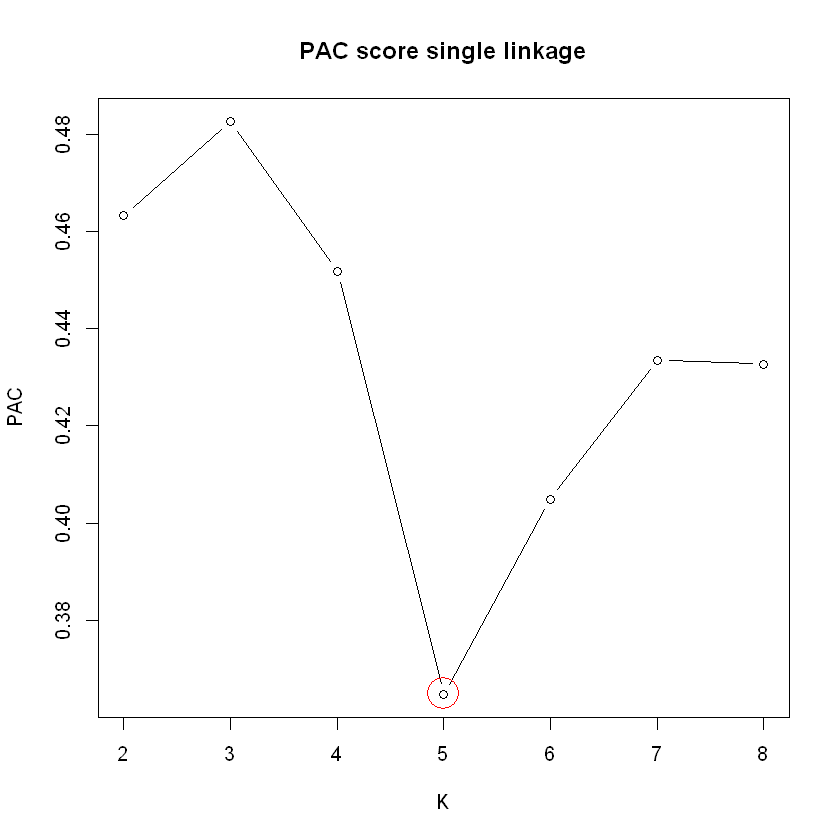

In [45]:
# PAC score computation for hc
maximum.K = 8
K = 2:maximum.K
x1 = 0.01; x2 = 0.99 
PAC = rep(NA,length(K)) 

names(PAC) = paste("K=",K,sep="") 

for(i in K){
  M = chc.sing[[i]]$consensusMatrix
  Fn = ecdf(M[lower.tri(M)])
  PAC[i-1] = Fn(x2) - Fn(x1)
}

# The optimal K
optK = K[which.min(PAC)]

print(PAC)
print(optK)
##############################


plot(c(2:8), PAC, type = "b", main = "PAC score single linkage", xlab = "K")
symbols(x=c(5), y=c(0.365),circles=0.15, add=T, inches=F, fg = "red")